In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
empresas_rfb = pd.read_csv('/content/drive/MyDrive/Data/empresa2009.csv')

ParserError: ignored

# Montando o dataset de trabalho:

## Importando os dados

A tabela empresas contém 7 colunas e 4.494.860 linhas, ocupando cerca de 240 mb na memória

In [ ]:
empresas_rfb = pd.read_csv('/content/drive/MyDrive/Data/empresa2009.csv', encoding='ISO-8859-1',decimal=',', sep=';' ,dtype=str, header=None, names=['cnpj_basico', 'razao_social', 'nat_jur', 'qual_resp', 'capital_social', 'porte_empresa', 'ente_resp']) #necessario colocaro ';'
print(empresas_rfb.shape)
empresas_rfb #relatar o erro de que o read_csv tenta usar o encoding utf8 e nao dá certo. decimal=',', #Latin 1 representa simbolos latinos

(4494860, 7)


,cnpj_basico,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp
0,36627987,MARIA LAUDECI SILVA DE ASSIS ALMEIDA 11182384862,2135,50,"000000002000,00",01,NaN
1,36627988,WILLIAN MEIRES DE MARINS 17802351782,2135,50,"000000000300,00",01,NaN
2,36627989,VERONICA TADEU PEREIRA 05548260707,2135,50,"000000002500,00",01,NaN
3,36627991,MONICA DE MORAIS ROCHA 40845063898,2135,50,"000000001000,00",01,NaN
4,36627992,HERON SILVA DE MELLO 10584718721,2135,50,"000000002000,00",01,NaN
...,...,...,...,...,...,...,...
4494855,41938341,ELETRICA BARRA DO PRATA LTDA,2062,49,"0,00",05,NaN
4494856,41938358,LINEU RAGNOLI,2135,50,"0,00",01,NaN
4494857,41938366,DISQUE BEBE LTDA,2062,49,"0,00",05,NaN
4494858,41938374,PEDRO DE PAULA ARAUJO,2135,50,"0,00",01,NaN


A tabela Estabelecimentos contém 30 colunas e 4.753.435 linhas, ocupando cerca de 1.1+ GB na memória

In [ ]:
estabelecimentos = pd.read_csv('/content/drive/MyDrive/Data/estabelecimentos.csv', encoding='ISO-8859-1', dtype=str, sep=';', decimal=',', header=None, names=['cnpj_basico', 'ordem', 'dv', 'matriz_filial', 'nome', 'situacao_cadastral', 'data_sit_cad',
'motivo_sit_cad', 'cidade_exterior', 'cod_pais', 'inicio_atividade', 'cnae_principal', 'cnae_secund',
'tipo','logradouro','numero','complemento','bairro','cep','uf','municipio_rfb','ddd',
'tel','ddd2','tel2','dddfax','fax','email', 'sit_especial', 'data_sit_especial'])
print(estabelecimentos.shape)
estabelecimentos.head()

(4753435, 30)


,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial
0,39304501,0001,05,1,KATIA MODAS,2,20201005,0,NaN,NaN,20201005,4781400,NaN,10A RUA,B LOT PORTO CESAR,153,CASA,GERERAU,61880000,CE,991,85,81963757,NaN,NaN,NaN,NaN,KATIASOUSACHAGAS@GMAIL.COM,NaN,NaN
1,39304513,0001,21,1,NaN,2,20201005,0,NaN,NaN,20201005,4929901,4929902,RUA,ARAPORA,32,NaN,RANCHO ALEGRE,38475000,MG,4855,34,91194763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39304523,0001,67,1,ECOTRACE ARQUITETURA SUSTENTAVEL,2,20201005,0,NaN,NaN,20201005,7111100,"7119703,7119799,7410202",RUA,LAURO MULLER,00076,APT 103,BOTAFOGO,22290160,RJ,6001,41,96869828,NaN,NaN,NaN,NaN,MEUCNPJ@CONTABILIZEI.COM.BR,NaN,NaN
3,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN
4,39304544,0001,82,1,CAT - COZINHA DE ALIMENTOS TRADICIONAIS,2,20201005,0,NaN,NaN,20201005,5620104,5620102,RUA,DOS PINHEIROS,139,NaN,JARDIM TORRAO DE OURO,12229318,SP,7099,12,32079659,NaN,NaN,NaN,NaN,PAULA_GIAN@HOTMAIL.COM,NaN,NaN


In [ ]:
estabelecimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753435 entries, 0 to 4753434
Data columns (total 30 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   cnpj_basico         object
 1   ordem               object
 2   dv                  object
 3   matriz_filial       object
 4   nome                object
 5   situacao_cadastral  object
 6   data_sit_cad        object
 7   motivo_sit_cad      object
 8   cidade_exterior     object
 9   cod_pais            object
 10  inicio_atividade    object
 11  cnae_principal      object
 12  cnae_secund         object
 13  tipo                object
 14  logradouro          object
 15  numero              object
 16  complemento         object
 17  bairro              object
 18  cep                 object
 19  uf                  object
 20  municipio_rfb       object
 21  ddd                 object
 22  tel                 object
 23  ddd2                object
 24  tel2                object
 25  dddfax            

### Convertendo os dados para string para que o pandas faça o merge corretamente :

In [ ]:
# estabelecimentos['cnpj_basico'] = estabelecimentos['cnpj_basico'].astype(str)

# empresas_rfb['cnpj_basico'] = empresas_rfb['cnpj_basico'].astype(str)

### Fazendo o merge

# Farei agora o merge ao dataset empresas, que contém informações como o Capital Social das empresas, o porte (se é micro empresa, por exemplo), a natureza jurídica (ex. S.A, limitada, etc). No entanto, como os dados disponíveis publicamente no site da RFB estão fragmentados, ou seja, não há correspondência do arquivo nomeado por exemplo 'empresa1' com o arquivo 'estabelecimento1', quando eu fiz o inner join, a intersecção resultante foi de +- 100.000 linhas entre as duas tabelas, diminuindo muito o tamanho do dataset. Decidi pelo left JOIN pois informação bem interessante seria reduzida sobre a tabela estabelecimentos. Dei a preferência por deixar à esquerda a tabela Estabelecimentos porque ela que contém o target do dataset e suas variáveis independentes.

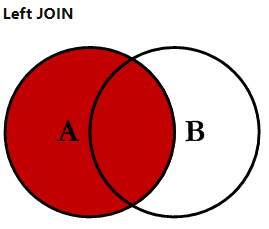

In [ ]:
data = pd.merge(estabelecimentos, empresas_rfb, how='left', on='cnpj_basico') #inner merge, só o que achar

#estabelecimentos['cnpj_basico'] = estabelecimentos.merge(empresas_rfb, on='cnpj_basico', how='inner')['cnpj_basico'].values
data

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp
0,39304501,0001,05,1,KATIA MODAS,2,20201005,0,NaN,NaN,20201005,4781400,NaN,10A RUA,B LOT PORTO CESAR,153,CASA,GERERAU,61880000,CE,991,85,81963757,NaN,NaN,NaN,NaN,KATIASOUSACHAGAS@GMAIL.COM,NaN,NaN,KATIA MARIA SOUZA DAS CHAGAS 91152992368,2135,50,"000000001000,00",01,NaN
1,39304513,0001,21,1,NaN,2,20201005,0,NaN,NaN,20201005,4929901,4929902,RUA,ARAPORA,32,NaN,RANCHO ALEGRE,38475000,MG,4855,34,91194763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALDENIR FERNANDES DE MENDONCA 05806484602,2135,50,"000000010000,00",01,NaN
2,39304523,0001,67,1,ECOTRACE ARQUITETURA SUSTENTAVEL,2,20201005,0,NaN,NaN,20201005,7111100,"7119703,7119799,7410202",RUA,LAURO MULLER,00076,APT 103,BOTAFOGO,22290160,RJ,6001,41,96869828,NaN,NaN,NaN,NaN,MEUCNPJ@CONTABILIZEI.COM.BR,NaN,NaN,BACELAR E AZEVEDO ARQUITETURA LTDA,2062,49,"000000001000,00",01,NaN
3,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN
4,39304544,0001,82,1,CAT - COZINHA DE ALIMENTOS TRADICIONAIS,2,20201005,0,NaN,NaN,20201005,5620104,5620102,RUA,DOS PINHEIROS,139,NaN,JARDIM TORRAO DE OURO,12229318,SP,7099,12,32079659,NaN,NaN,NaN,NaN,PAULA_GIAN@HOTMAIL.COM,NaN,NaN,SUELI APARECIDA DE PAULA 07127830835,2135,50,"000000003000,00",01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753430,39039725,0001,29,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,LEOPOLDO MOREIRA MAIA,290,CASA,CAMPOS ELISIOS,37275000,MG,4403,0,0,NaN,NaN,0,0,romario.evolucao@gmail.com,NaN,NaN,ELEICAO 2020 NATHANE DE SOUSA SILVA VEREADOR,4090,51,"0,00",05,NaN
4753431,39039737,0001,53,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,PRACA,DOMINGOS JOSE MARTINS,S N,NaN,CENTRO,29330000,ES,5655,0,0,NaN,NaN,0,0,NOSSOPOVONOSSAMISSAO@GMAIL.COM,NaN,NaN,ELEICAO 2020 ALCIONE RODRIGUES DE CARVALHO VER...,4090,51,"0,00",05,NaN
4753432,39039749,0001,88,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,RUA ODETE VILLELA PRATA,156,CASA,RESIDENCIAL RIO DE JANEIRO,38041348,MG,5401,0,0,NaN,NaN,0,0,leandrovisao10@gmail.com,NaN,NaN,ELEICAO 2020 HUDSON CAMPOS DE LIMA VEREADOR,4090,51,"0,00",05,NaN
4753433,39039760,0001,48,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,JOSE MARIA PIRES,10,NaN,NOVA ESPERANCA,28750000,RJ,5917,0,0,NaN,NaN,0,0,CANDIDATOS_R@OUTLOOK.COM,NaN,NaN,ELEICAO 2020 MURILLO PORTUGAL DE REZENDE FELIX...,4090,51,"0,00",05,NaN


A tabela resultante do merge por LEFT JOIN das tabelas estabelecimentos e empresas naturalmente tem o mesmo número de linhas da tabela estabelecimento, mas possui 36 colunas. Não há 37 colunas, pois o merge foi feito por meio da variável 'cnpj_basico' que é comum nas duas tabelas.

In [ ]:
estabelecimentos.shape #igual ao tamanho do merge, portanto left join

(4753435, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753435 entries, 0 to 4753434
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   cnpj_basico         object
 1   ordem               object
 2   dv                  object
 3   matriz_filial       object
 4   nome                object
 5   situacao_cadastral  object
 6   data_sit_cad        object
 7   motivo_sit_cad      object
 8   cidade_exterior     object
 9   cod_pais            object
 10  inicio_atividade    object
 11  cnae_principal      object
 12  cnae_secund         object
 13  tipo                object
 14  logradouro          object
 15  numero              object
 16  complemento         object
 17  bairro              object
 18  cep                 object
 19  uf                  object
 20  municipio_rfb       object
 21  ddd                 object
 22  tel                 object
 23  ddd2                object
 24  tel2                object
 25  dddfax            

Para o projeto, decidi reduzir o tamanho do dataset que possui mais de 1.3 GB, selecionando o Estado de maior atividade econômica, que é São Paulo. Essa seleção terá 1.361.981 registros (cerca de 3 milhões de registros a menos) e 36 colunas

In [ ]:
sp = data[data['uf'] == 'SP'] #Selecionarei apenas dados de Sampa para a análise
sp

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp
3,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN
4,39304544,0001,82,1,CAT - COZINHA DE ALIMENTOS TRADICIONAIS,2,20201005,0,NaN,NaN,20201005,5620104,5620102,RUA,DOS PINHEIROS,139,NaN,JARDIM TORRAO DE OURO,12229318,SP,7099,12,32079659,NaN,NaN,NaN,NaN,PAULA_GIAN@HOTMAIL.COM,NaN,NaN,SUELI APARECIDA DE PAULA 07127830835,2135,50,"000000003000,00",01,NaN
6,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN
11,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,NaN,20201005,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062,49,"000000050000,00",03,NaN
14,39304644,0001,09,1,AEDIFICATORE IMOVEIS,2,20201005,0,NaN,NaN,20201005,4120400,6810201,AVENIDA,EMILIA MARCHI MARTINI,688,NaN,JARDIM SOARES,13840090,SP,6715,19,38314281,19,38314736,19,38314736,ESCRITORIOATUAL@YAHOO.COM.BR,NaN,NaN,AEDIFICATORE IMOVEIS A & S LTDA,2062,49,"000000020000,00",01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753420,39039609,0001,00,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,RUA COELHO NETO,230,NaN,VILA XAVIER,19802070,SP,6179,0,0,NaN,NaN,0,0,rodolfoafif@gmail.com,NaN,NaN,ELEICAO 2020 VALDEMIR CUPERTINO DUARTE VEREADOR,4090,51,"0,00",05,NaN
4753423,39039643,0001,84,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,FUNDADORES,07,NaN,CENTRO,16260000,SP,6351,0,0,NaN,NaN,0,0,leonardo_balaio@hotmail.com,NaN,NaN,ELEICAO 2020 RONALDO MAESTA VEREADOR,4090,51,"0,00",05,NaN
4753426,39039679,0001,68,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,RUA,APRIGIO DE ARAUJO,864,SALA 108,CENTRO,14160030,SP,7135,0,0,NaN,NaN,0,0,TIAO.MACEDO13@GMAIL.COM,NaN,NaN,ELEICAO 2020 SILVIA APARECIDA GUIMARAES VEREADOR,4090,51,"0,00",05,NaN
4753427,39039690,0001,28,1,NaN,8,20201231,1,NaN,NaN,20200926,9492800,NaN,AVENIDA,AVENIDA JOSE DE SOUZA CAMPOS,2200,ATE 900 LADO PAR,NOVA CAMPINAS,13092123,SP,6291,0,0,NaN,NaN,0,0,rosanalehdias@gmail.com,NaN,NaN,ELEICAO 2020 ROSANA LEH DIAS VEREADOR,4090,51,"0,00",05,NaN


Como a pergunta do projeto é se conseguimos prever se uma empresa está ativa ou fechada, estimando uma probabilidade (risco), selecionarei apenas as empresas que estão ativas (0) ou que fecharam por liquidação voluntária (1). O dataset obtido é de 1.009.714 de linhas

In [ ]:
#### QUERO SABER APENAS DAS EMPRESAS NA ATIVA E AQUELAS QUE FORAM FECHADAS POR LIQUIDAÇÃO 
#### VOLUNTÁRIA, MOTIVO_SIT_CAD = 1

um = sp['motivo_sit_cad'] == '1'
dois = sp['motivo_sit_cad'] == '0'
sp_binario = sp[um|dois].copy()
sp_binario.shape

(1009714, 36)

In [ ]:
sp_binario.columns, sp_binario.shape

(Index(['cnpj_basico', 'ordem', 'dv', 'matriz_filial', 'nome',
        'situacao_cadastral', 'data_sit_cad', 'motivo_sit_cad',
        'cidade_exterior', 'cod_pais', 'inicio_atividade', 'cnae_principal',
        'cnae_secund', 'tipo', 'logradouro', 'numero', 'complemento', 'bairro',
        'cep', 'uf', 'municipio_rfb', 'ddd', 'tel', 'ddd2', 'tel2', 'dddfax',
        'fax', 'email', 'sit_especial', 'data_sit_especial', 'razao_social',
        'nat_jur', 'qual_resp', 'capital_social', 'porte_empresa', 'ente_resp'],
       dtype='object'), (1009714, 36))

### Acredito que há informações importantes para calcular o risco de uma empresa fechar ou continuar funcionando em dados econômicos do IBGE. Vamos juntar agora com a tabela do Tesouro Nacional (há a correspondência entre o código do municipio da RFB com o código do IBGE) que será o link entre as demais tabelas que serão adicionadas:

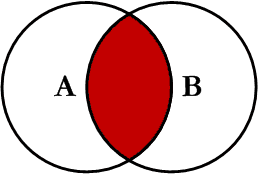

In [ ]:
tabmuni = pd.read_csv('/content/drive/MyDrive/Data/Tesouro/tabmuni2.csv', sep=';',header=None, dtype=str,
                      encoding='ISO-8859-1',
                      names=['municipio_rfb', 'cnpj_m', 'descricao', 'UF', 'CodigoIbge'])
del tabmuni['cnpj_m']
tabmuni

,municipio_rfb,descricao,UF,CodigoIbge
0,ï»¿municipio_rfb,DESCRIÃÃO,UF,CodigoIbge
1,1,GUAJARA-MIRIM,RO,1100106
2,2,ALTO ALEGRE DOS PARECIS,RO,1100379
3,3,PORTO VELHO,RO,1100205
4,8,CUJUBIM,RO,1100940
...,...,...,...,...
5585,1190,MOJUI DOS CAMPOS,PA,1504752
5586,1192,BALNEARIO RINCAO,SC,4220000
5587,1194,PESCARIA BRAVA,SC,4212650
5588,1196,PARAISO DAS AGUAS,MS,5006275


In [ ]:
# tabmuni['municipio_rfb'] = tabmuni['municipio_rfb'].astype(str) #Melhor string na hora do merge que object, dá menos erro.
# sp_binario['municipio_rfb'] = sp_binario['municipio_rfb'].astype(str)
          

In [ ]:
sp_binario_municipio = pd.merge(sp_binario, tabmuni, on='municipio_rfb') #1009714 rows × 39 columns
sp_binario_municipio['CodigoIbge']= sp_binario_municipio['CodigoIbge'].astype(str)

sp_binario_municipio #Há a intersecção dos elementos

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308
2,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,NaN,20201005,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062,49,"000000050000,00",03,NaN,SAO PAULO,SP,3550308
3,39304717,0001,62,1,HORTIFRUTI NOSSO LAR,2,20201005,0,NaN,NaN,20201005,4724500,NaN,RUA,ENGENHEIRO CARLO GRAZIA,135,NaN,CIDADE TIRADENTES,08475410,SP,7107,11,51243081,NaN,NaN,NaN,NaN,JACIARAFABIOKK@GMAIL.COM,NaN,NaN,JACIARA ALVES MACIEL DA SILVA 29089936866,2135,50,"000000003000,00",01,NaN,SAO PAULO,SP,3550308
4,37419658,0003,04,2,GOLDEN BLUE,2,20201005,0,NaN,NaN,20201005,4635403,"4672900,4685100,4686902,4930202",RUA,ABRAHAO CALUX,103,NaN,VILA MOINHO VELHO,04286100,SP,7107,64,33221440,NaN,NaN,NaN,NaN,GOLDENBLUEIND@GMAIL.COM,NaN,NaN,GOLDEN BLUE BEBIDAS E DERIVADOS EIRELI,2305,65,"000000104500,00",03,NaN,SAO PAULO,SP,3550308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009709,35607687,0001,02,1,GIG @ NET,2,20191125,0,NaN,NaN,20191125,6110803,6190601,RUA,DONA MARIA FAUSTINA,241,NaN,CENTRO,17475000,SP,6651,14,37327645,14,37324648,14,37327645,MARKACONTABIL2010@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504
1009710,36984322,0001,60,1,NaN,2,20200206,0,NaN,NaN,20200206,151203,NaN,FAZENDA,CANDEIAS,SN,NaN,ALAMBARI,17479899,SP,6651,14,32821989,NaN,NaN,14,32821989,REGIONAL@AONET.COM.BR,NaN,NaN,MOISES RIBEIRO DE QUEIROZ,4120,59,"0,00",05,NaN,LUCIANOPOLIS,SP,3527504
1009711,37588106,0001,68,1,COMERCIAL TG,2,20200701,0,NaN,NaN,20200701,4712100,NaN,RUA,DONA MARIA FAUSTINA,171,NaN,CENTRO,17475021,SP,6651,14,98498337,NaN,NaN,NaN,NaN,DRIETIFFANY_NUNES@HOTMAIL.COM,NaN,NaN,ADRIANA NUNES DOS SANTOS 38581484824,2135,50,"000000001000,00",01,NaN,LUCIANOPOLIS,SP,3527504
1009712,37917664,0001,20,1,NaN,2,20200730,0,NaN,NaN,20200730,4744005,4930202,RUA,SAO PEDRO,249,NaN,CENTRO,17475001,SP,6651,14,32825382,NaN,NaN,NaN,NaN,NASCIMENTO.ESCRITORIO@GMAIL.COM,NaN,NaN,SIMEI FARIA DE SOUZA,2135,50,"000000080000,00",01,NaN,LUCIANOPOLIS,SP,3527504


In [ ]:
sp_binario_municipio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009714 entries, 0 to 1009713
Data columns (total 39 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   cnpj_basico         1009714 non-null  object
 1   ordem               1009714 non-null  object
 2   dv                  1009714 non-null  object
 3   matriz_filial       1009714 non-null  object
 4   nome                524911 non-null   object
 5   situacao_cadastral  1009714 non-null  object
 6   data_sit_cad        1009714 non-null  object
 7   motivo_sit_cad      1009714 non-null  object
 8   cidade_exterior     0 non-null        object
 9   cod_pais            203 non-null      object
 10  inicio_atividade    1009714 non-null  object
 11  cnae_principal      1009714 non-null  object
 12  cnae_secund         444930 non-null   object
 13  tipo                1005620 non-null  object
 14  logradouro          1009709 non-null  object
 15  numero              1009708 non-

In [ ]:
#testa se o merge deu certo, se não deu certo mostra linhas que ficaram de fora, se deu certo o output é vazio

df_merged = pd.merge(sp_binario, 
                     tabmuni,
                     how = 'outer',
                     left_on = ['municipio_rfb'],
                     right_on = ['municipio_rfb'], 
                     indicator = True)

deleted_rows = df_merged.loc[df_merged._merge == "left_only",]
deleted_rows #se retornasse alguma coisa era porque o merge nao deu certo, iria mostrar o que ficou de fora

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge,_merge


In [ ]:
deleted_rows.shape, deleted_rows['municipio_rfb'].value_counts()

((0, 40), Series([], Name: municipio_rfb, dtype: int64))

## Importando tabela de Renda Média do IBGE

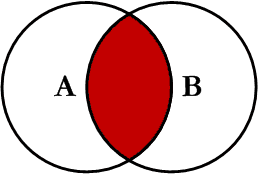

In [ ]:
tabela3527 = pd.read_csv('/content/drive/MyDrive/Data/IBGE/tabela3527.csv' , sep=',', dtype=str, header=None, names=['CodigoIbge', 'Cidade', 'Renda_Media_Mensal'])
tabela3527['CodigoIbge'] = tabela3527['CodigoIbge'].astype(str)
tabela3527.shape

(5578, 3)

Provavelmente a renda média mensal dos habitantes do municipio devem ter alguma relação com o sucesso ou fracasso de um negócio aberto no local.

### Adicionar tabela de Renda Media do IBGE

In [ ]:
sp_ibge = pd.merge(sp_binario_municipio,tabela3527, on='CodigoIbge')


## Adicionar Tabela de PIB dos Municipios

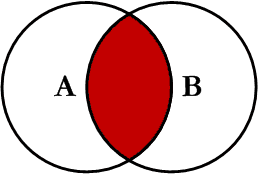

In [ ]:
pib = pd.read_csv('/content/drive/MyDrive/Data/IBGE/tabela5938.csv', sep=',', dtype=str, header=None, names=['CodigoIbge', 'Cidade_PIB', 'PIB'])

In [ ]:
#Fazendo o merge:

sp_ibge_PIB = pd.merge(sp_ibge, pib, on='CodigoIbge')
sp_ibge

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge,Cidade,Renda_Media_Mensal
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
2,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,NaN,20201005,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062,49,"000000050000,00",03,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
3,39304717,0001,62,1,HORTIFRUTI NOSSO LAR,2,20201005,0,NaN,NaN,20201005,4724500,NaN,RUA,ENGENHEIRO CARLO GRAZIA,135,NaN,CIDADE TIRADENTES,08475410,SP,7107,11,51243081,NaN,NaN,NaN,NaN,JACIARAFABIOKK@GMAIL.COM,NaN,NaN,JACIARA ALVES MACIEL DA SILVA 29089936866,2135,50,"000000003000,00",01,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
4,37419658,0003,04,2,GOLDEN BLUE,2,20201005,0,NaN,NaN,20201005,4635403,"4672900,4685100,4686902,4930202",RUA,ABRAHAO CALUX,103,NaN,VILA MOINHO VELHO,04286100,SP,7107,64,33221440,NaN,NaN,NaN,NaN,GOLDENBLUEIND@GMAIL.COM,NaN,NaN,GOLDEN BLUE BEBIDAS E DERIVADOS EIRELI,2305,65,"000000104500,00",03,NaN,SAO PAULO,SP,3550308,São Paulo (SP),4427.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009709,35607687,0001,02,1,GIG @ NET,2,20191125,0,NaN,NaN,20191125,6110803,6190601,RUA,DONA MARIA FAUSTINA,241,NaN,CENTRO,17475000,SP,6651,14,37327645,14,37324648,14,37327645,MARKACONTABIL2010@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57
1009710,36984322,0001,60,1,NaN,2,20200206,0,NaN,NaN,20200206,151203,NaN,FAZENDA,CANDEIAS,SN,NaN,ALAMBARI,17479899,SP,6651,14,32821989,NaN,NaN,14,32821989,REGIONAL@AONET.COM.BR,NaN,NaN,MOISES RIBEIRO DE QUEIROZ,4120,59,"0,00",05,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57
1009711,37588106,0001,68,1,COMERCIAL TG,2,20200701,0,NaN,NaN,20200701,4712100,NaN,RUA,DONA MARIA FAUSTINA,171,NaN,CENTRO,17475021,SP,6651,14,98498337,NaN,NaN,NaN,NaN,DRIETIFFANY_NUNES@HOTMAIL.COM,NaN,NaN,ADRIANA NUNES DOS SANTOS 38581484824,2135,50,"000000001000,00",01,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57
1009712,37917664,0001,20,1,NaN,2,20200730,0,NaN,NaN,20200730,4744005,4930202,RUA,SAO PEDRO,249,NaN,CENTRO,17475001,SP,6651,14,32825382,NaN,NaN,NaN,NaN,NASCIMENTO.ESCRITORIO@GMAIL.COM,NaN,NaN,SIMEI FARIA DE SOUZA,2135,50,"000000080000,00",01,NaN,LUCIANOPOLIS,SP,3527504,Lucianópolis (SP),2458.57


### Operação de merge com a tabela Populacao  do IBGE:

In [ ]:
populacao = pd.read_csv('/content/drive/MyDrive/Data/IBGE/tabela6579.csv', sep=',', dtype=str, header=None, names=['CodigoIbge', 'Cidade_POP', 'populacao'])
del populacao['Cidade_POP']


In [ ]:
sp_ibge_PIB = pd.merge(sp_ibge_PIB, populacao, on='CodigoIbge')

In [ ]:
sp_ibge_PIB.shape

(1009714, 44)

Após todos esses merges com tabelas do IBGE aumentamos apenas o número de colunas, mostrando que os merges foram bem suscedidos.

## Os tipos de dados (dtypes) do dataset:

In [ ]:
sp_ibge_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009714 entries, 0 to 1009713
Data columns (total 44 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   cnpj_basico         1009714 non-null  object
 1   ordem               1009714 non-null  object
 2   dv                  1009714 non-null  object
 3   matriz_filial       1009714 non-null  object
 4   nome                524911 non-null   object
 5   situacao_cadastral  1009714 non-null  object
 6   data_sit_cad        1009714 non-null  object
 7   motivo_sit_cad      1009714 non-null  object
 8   cidade_exterior     0 non-null        object
 9   cod_pais            203 non-null      object
 10  inicio_atividade    1009714 non-null  object
 11  cnae_principal      1009714 non-null  object
 12  cnae_secund         444930 non-null   object
 13  tipo                1005620 non-null  object
 14  logradouro          1009709 non-null  object
 15  numero              1009708 non-

Deletar colunas repetidas:

In [ ]:
del sp_ibge_PIB['Cidade_PIB']
del sp_ibge_PIB['Cidade']
#Deletar também as colunas que são tudo NULL:


In [ ]:
# del sp_ibge_PIB['CNPJ'] #DELETAR O CNPJ DOS MUNICIPIOS

In [ ]:
sp_ibge_PIB.head(2)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,descricao,UF,CodigoIbge,Renda_Media_Mensal,PIB,populacao
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232


Renomear colunas com nomes nebulosos:

In [ ]:
sp_ibge_PIB.rename(columns = {'descricao': 'municipio'}, inplace=True)

In [ ]:
#colocar tudo em lowercase:
sp_ibge_PIB.columns = map(str.lower, sp_ibge_PIB.columns)
sp_ibge_PIB.head(2)


,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232


In [ ]:
data_final = sp_ibge_PIB.copy()
data_final.head(2)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
0,39304534,0001,47,1,NaN,2,20201005,0,NaN,NaN,20201005,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,"000000300000,00",05,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232
1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,NaN,20201005,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,"000000001000,00",01,NaN,SAO PAULO,SP,3550308,4427.54,714683362,12325232


In [ ]:
data_final.shape

(1009714, 42)

In [ ]:
data_final.to_csv('/content/drive/MyDrive/Data/dataset_final_merge.csv', index=False) #para nao gerar uma coluna unnamed0
#https://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.DataFrame.to_csv.html

In [ ]:
data_final.shape

(1009714, 42)

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009714 entries, 0 to 1009713
Data columns (total 42 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   cnpj_basico         1009714 non-null  object        
 1   ordem               1009714 non-null  object        
 2   dv                  1009714 non-null  object        
 3   matriz_filial       1009714 non-null  object        
 4   nome                524911 non-null   object        
 5   situacao_cadastral  1009714 non-null  object        
 6   data_sit_cad        1004463 non-null  datetime64[ns]
 7   motivo_sit_cad      1009714 non-null  object        
 8   cidade_exterior     0 non-null        object        
 9   cod_pais            203 non-null      object        
 10  inicio_atividade    1009714 non-null  datetime64[ns]
 11  cnae_principal      1009714 non-null  object        
 12  cnae_secund         444930 non-null   object        
 13  tipo        

## ANÁLISE EXPLORATÓRIA VISUAL

In [ ]:
data_final = pd.read_csv('/content/drive/MyDrive/Data/dataset_final_merge.csv', dtype=object)

### Convertendo os tipos de string para float

In [ ]:
data_final['renda_media_mensal'] = data_final['renda_media_mensal'].astype(float)
data_final['pib'] = data_final['pib'].astype(float)
data_final['populacao'] = data_final['populacao'].astype(float)
data_final['capital_social'] = data_final['capital_social'].str.replace(',', '').astype(float)
#Convertendo em formato datetime:

data_final['data_sit_cad'] = pd.to_datetime(data_final['data_sit_cad'], infer_datetime_format=True, errors='coerce')
data_final['inicio_atividade'] = pd.to_datetime(data_final['inicio_atividade'], infer_datetime_format=True, errors='coerce')


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009714 entries, 0 to 1009713
Data columns (total 42 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   cnpj_basico         1009714 non-null  object        
 1   ordem               1009714 non-null  object        
 2   dv                  1009714 non-null  object        
 3   matriz_filial       1009714 non-null  object        
 4   nome                524911 non-null   object        
 5   situacao_cadastral  1009714 non-null  object        
 6   data_sit_cad        1004463 non-null  datetime64[ns]
 7   motivo_sit_cad      1009714 non-null  object        
 8   cidade_exterior     0 non-null        object        
 9   cod_pais            203 non-null      object        
 10  inicio_atividade    1009714 non-null  datetime64[ns]
 11  cnae_principal      1009714 non-null  object        
 12  cnae_secund         444930 non-null   object        
 13  tipo        

In [ ]:
#Convertendo em formato datetime:

data_final['data_sit_cad'] = pd.to_datetime(data_final['data_sit_cad'], infer_datetime_format=True, errors='coerce')
data_final['inicio_atividade'] = pd.to_datetime(data_final['inicio_atividade'], infer_datetime_format=True, errors='coerce')

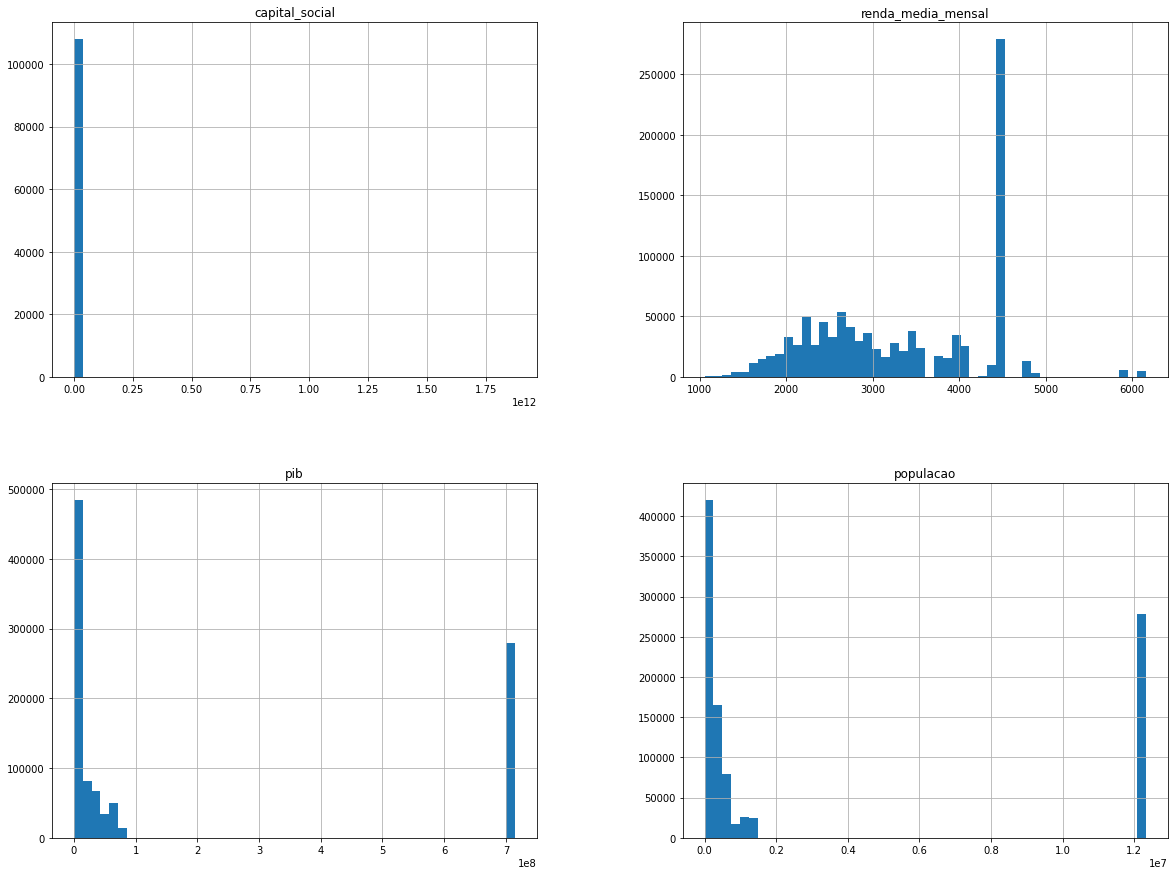

In [ ]:
%matplotlib inline
import matplotlib as plt
data_final.hist(bins=50, figsize=(20,15))
plt.pyplot.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #para remover a notação científica
data_final.describe()

,capital_social,renda_media_mensal,pib,populacao
count,107965.000,1009714.000,1009714.000,1009714.000
mean,557670919.788,3322.277,209004717.120,3634704.266
std,31845254565.749,980.860,312971924.689,5379207.160
min,0.000,1059.610,30025.000,838.000
25%,100000.000,2474.720,3042930.000,89125.000
50%,100000.000,3256.340,15287483.000,375011.000
75%,500000.000,4427.540,714683362.000,12325232.000
max,1874441494298.000,6157.260,714683362.000,12325232.000


#Vamos ver a proporção de cnpjs abertos (0) e fechados (1):


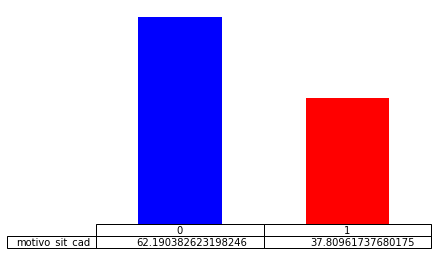

In [ ]:
#Vamos ver a proporção de cnpjs abertos e fechados:
target = data_final['motivo_sit_cad'].value_counts(normalize=True)*100
target.plot(kind='bar', table=True, color=['b','r'])
plt.pyplot.axis('off')
plt.pyplot.show()

Por o target ser skewed (desbalanceada a proporção), uma métrica mais apropriada é a AUC ROC (approaching almost any machine learning problem abhishek thakur)

## Procurando uma "decision boundary" que separe os dados

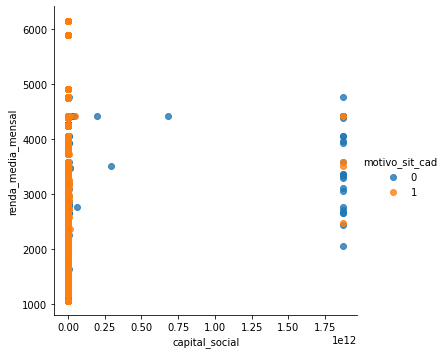

In [ ]:

import seaborn as sns

sns.lmplot(x="capital_social", y="renda_media_mensal", hue='motivo_sit_cad', data=data_final, fit_reg=False, x_jitter=0.1, y_jitter=0.1)


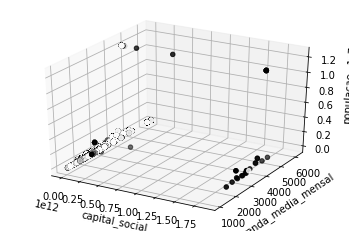

In [ ]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data_final['capital_social']
y = data_final['renda_media_mensal']
z = data_final['populacao']

ax.set_xlabel("capital_social")
ax.set_ylabel("renda_media_mensal")
ax.set_zlabel("populacao")

ax.scatter(x, y, z, c=data_final['motivo_sit_cad'])

plt.pyplot.show()

# Explorando os dados:

# Empresas ativas

In [ ]:
filtro_so_0 = data_final['motivo_sit_cad']=='0'
cnpj_abriu = data_final[filtro_so_0]
cnpj_abriu.head(2)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
0,39304534,0001,47,1,NaN,2,2020-10-05,0,NaN,NaN,2020-10-05,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062,49,30000000.0,05,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
1,39304564,0001,53,1,BRUNO LESSA,2,2020-10-05,0,NaN,NaN,2020-10-05,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135,50,100000.0,01,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0


In [ ]:
cnpj_abriu = cnpj_abriu[['inicio_atividade', 'motivo_sit_cad']].groupby(by='inicio_atividade' ).agg('count') #, as_index=False , se quiser tirar do index as datas
#cnpj_abriu = cnpj_abriu[['data_sit_cad', 'motivo_sit_cad']].groupby(by='data_sit_cad' ).agg('count')
cnpj_abriu.head()

,motivo_sit_cad
inicio_atividade,
1908-08-25,1
1917-01-31,1
1927-04-05,1
1929-06-20,1
1934-01-16,1


Interessante observar que segundo dos dados da Receita o CNPJ mais antigo nessa extração é de 25 de agosto de 1908

In [ ]:
cnpj_abriu.shape

(14919, 1)

In [ ]:
data_final.loc[data_final['inicio_atividade']=='2021-03-13'].head(3)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
16762,41201871,0001,50,1,ESPACO MULHER,2,2021-03-13,0,NaN,NaN,2021-03-13,4781400,"5320202,4789099,9602501,4729699,7319002,522310...",AVENIDA,PAULA FERREIRA,1488,NaN,VILA PIRITUBA,02915100,SP,7107,11,37966764,NaN,NaN,NaN,NaN,ALEEPINHEIROCOMERCIAL@GMAIL.COM,NaN,NaN,ALESSANDRA PINHEIRO FONSECA DA SILVA 38062168867,2135,50,7000.0,1,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
16763,41201883,0001,85,1,REGINALDO FLORENCIO PINTO,2,2021-03-13,0,NaN,NaN,2021-03-13,5912099,"7420004,8219999,7420001",RUA,GERACINA,152,NaN,VILA MONTE SANTO,08062060,SP,7107,11,34619508,NaN,NaN,NaN,NaN,RRDECORACOES2013@GMAIL.COM,NaN,NaN,REGINALDO FLORENCIO PINTO 27704417878,2135,50,600.0,1,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
16765,41202231,0001,65,1,DISCRETO PRAZER,2,2021-03-13,0,NaN,NaN,2021-03-13,4789099,NaN,RUA,GASPAR LOURENCO,573,NaN,VILA MARIANA,04107001,SP,7107,11,98368317,NaN,NaN,NaN,NaN,SAMAHASAK@GMAIL.COM,NaN,NaN,KATIA SAMAHA NAPOLEONE 12598126858,2135,50,3000.0,1,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0


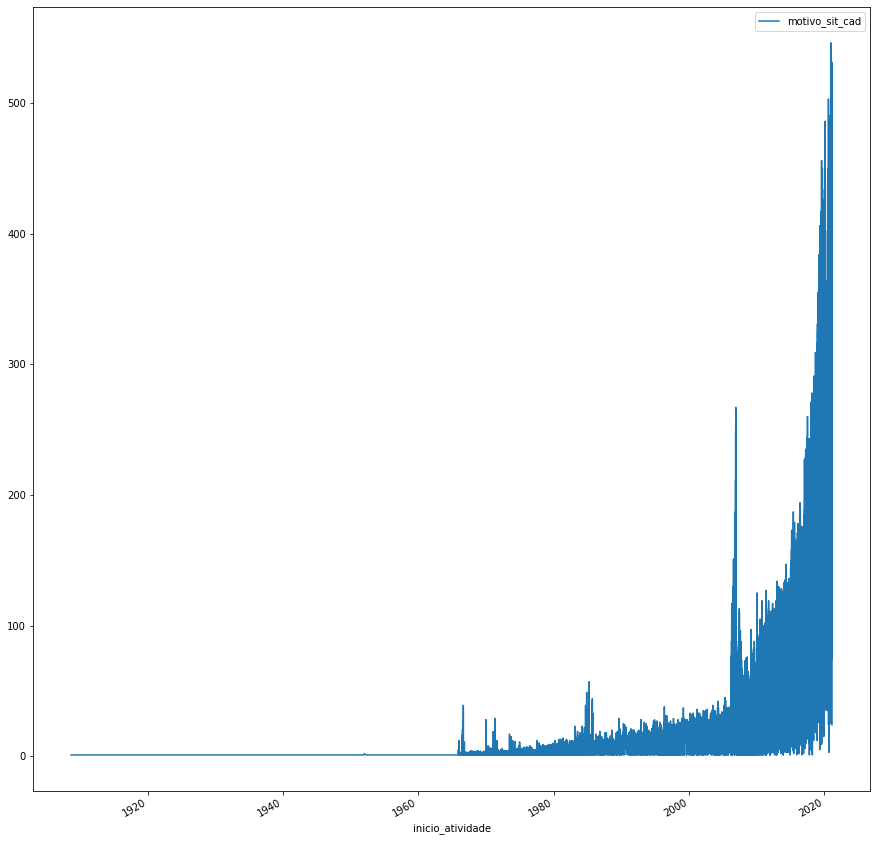

In [ ]:
cnpj_abriu.plot(kind='line', figsize=(15,16))

In [ ]:
cnpj_abriu.shape

(14919, 1)

## Pode-se observar que há um movimento de crescimento ao longo dos anos e no começo de cada ano há uma queda no número de cnpj abertos (matrizes e filiais), no entanto é interessante observar a forte queda na abertura de cnpjs em 2020. 

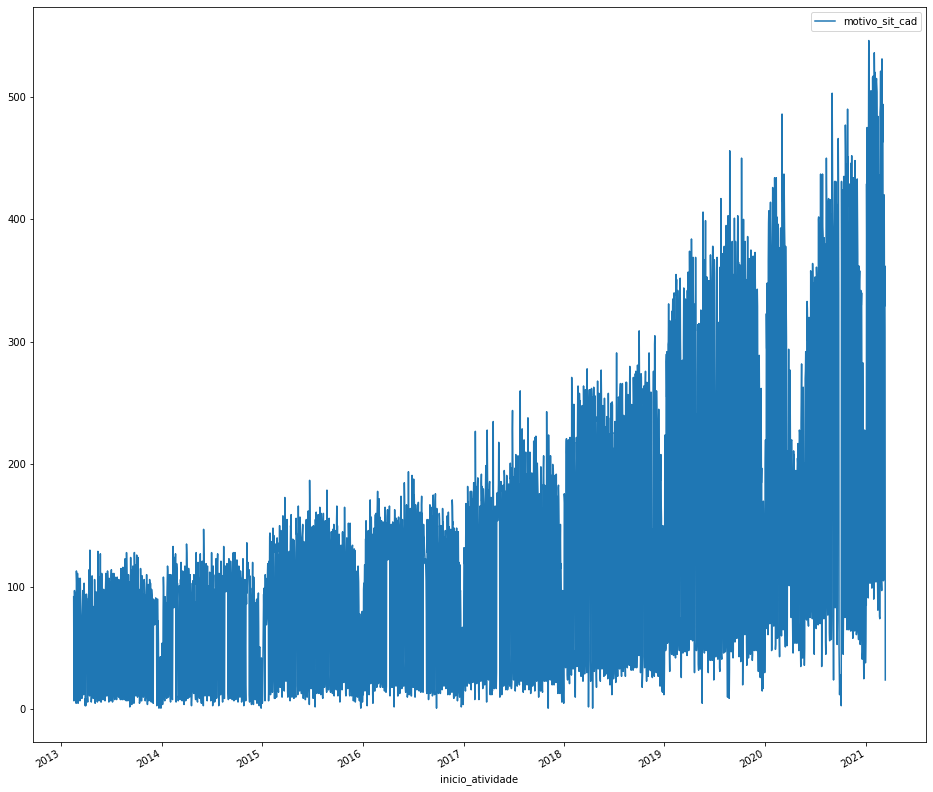

In [ ]:
cnpj_abriu.iloc[12000:, :].plot(kind='line', figsize=(16,15))

In [ ]:
cnpj_abriu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14919 entries, 1908-08-25 to 2021-03-13
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   motivo_sit_cad  14919 non-null  int64
dtypes: int64(1)
memory usage: 233.1 KB


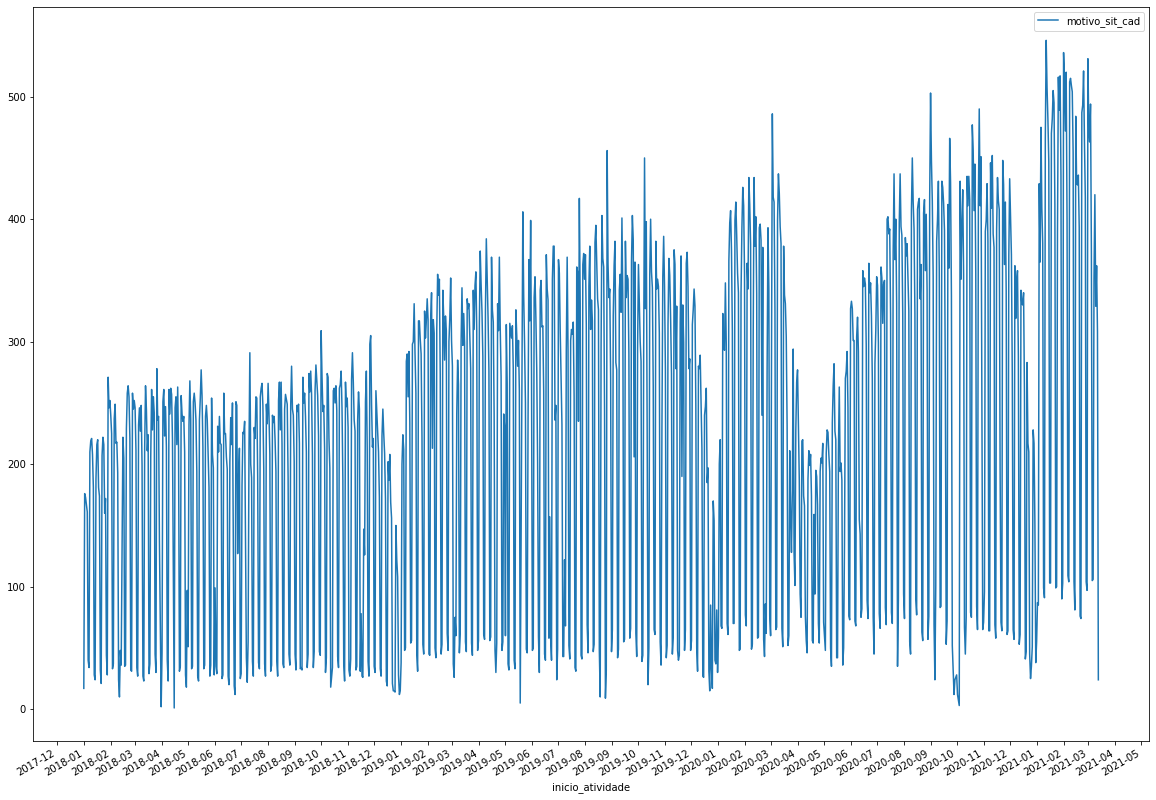

In [ ]:
#Pode-se observar que há uma queda brusca na abertura de cnpjs a partir do mês de março havendo uma recuperação no meses seguintes
#bem diferente do que acontece nos mesmos meses em 2019

import matplotlib.pylab as plt
import matplotlib.dates as mdates

ax = cnpj_abriu['20180101':'20210313'].plot(kind='line', figsize=(20,15), x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()

É possível ver o impacto do início da pandemia e a quarentena no gráfico seguinte:

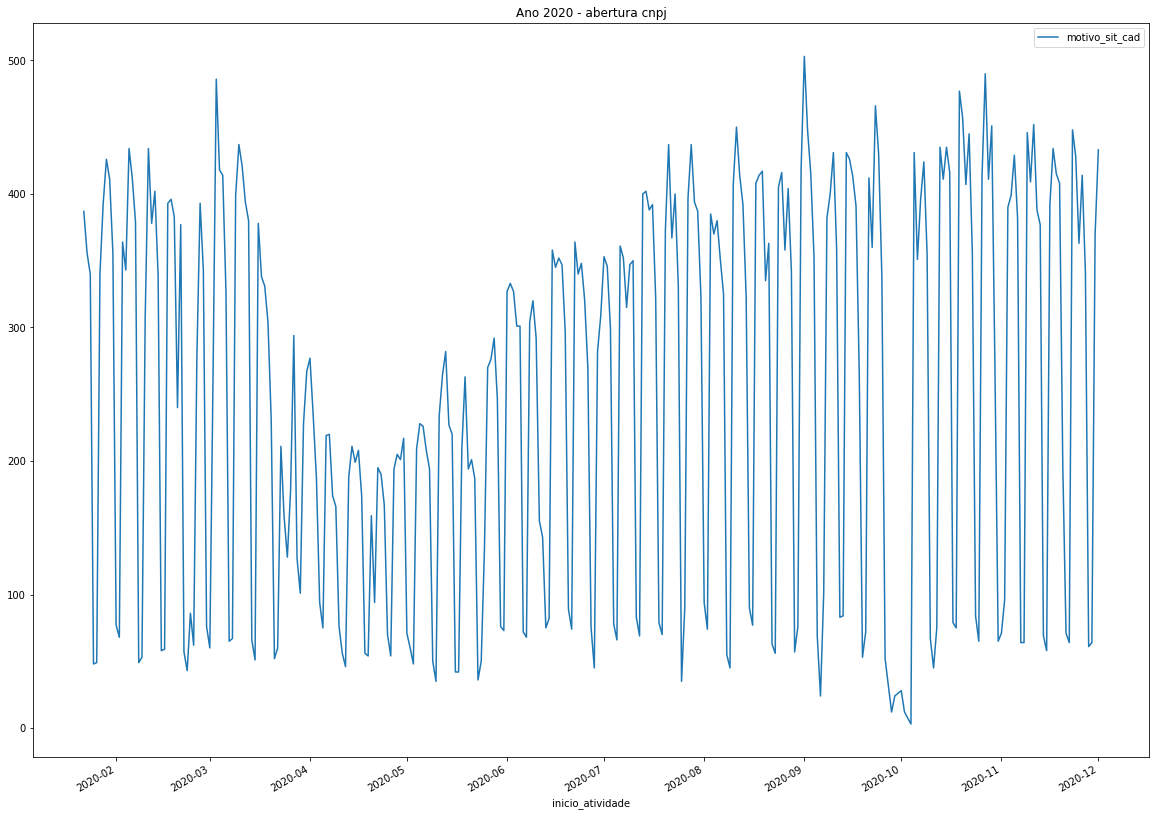

In [ ]:
ax = cnpj_abriu['20200122':'20201201'].plot(kind='line', figsize=(20,15), x_compat=True, title='Ano 2020 - abertura cnpj')
ax.xaxis.set_major_locator(mdates.MonthLocator()) #para os ticks do eixo x ficaram melhor distribuídos
plt.show()

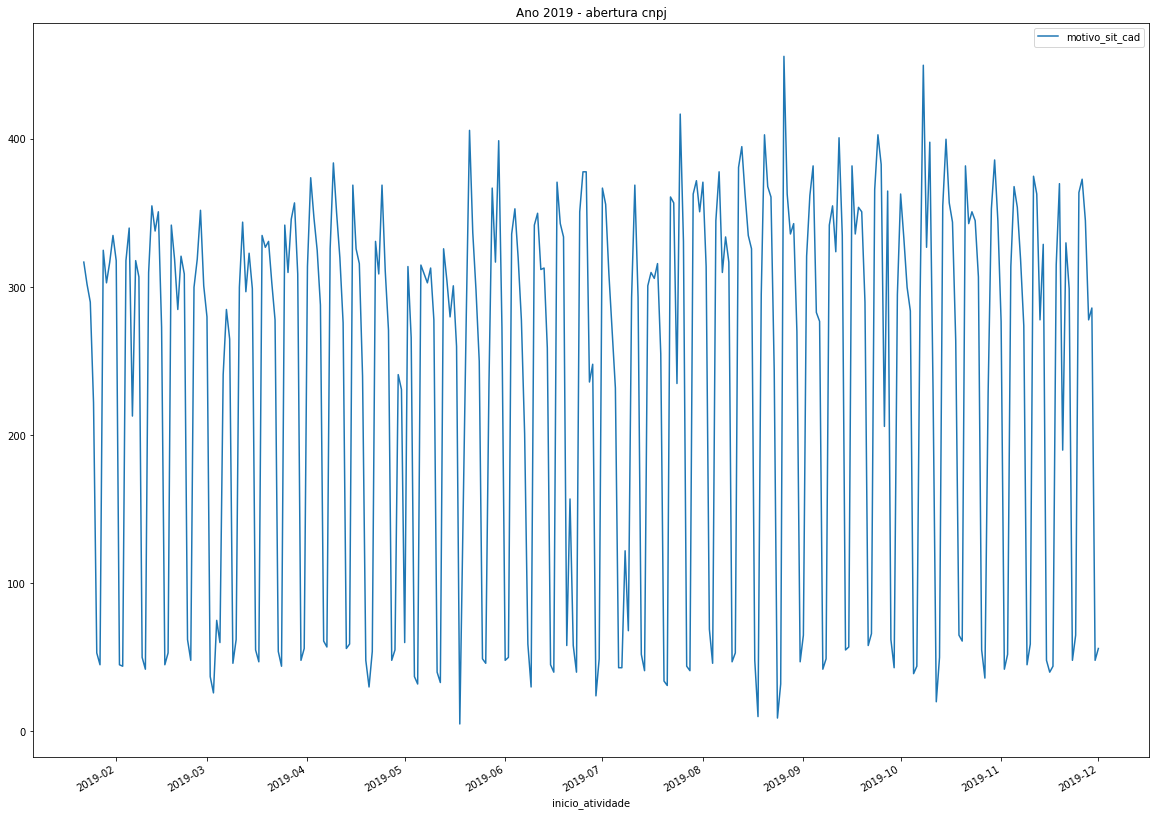

In [ ]:
ax = cnpj_abriu['20190122':'20191201'].plot(kind='line', figsize=(20,15), x_compat=True, title='Ano 2019 - abertura cnpj')
ax.xaxis.set_major_locator(mdates.MonthLocator()) #para os ticks do eixo x ficaram melhor distribuídos
plt.show()

Segundo o Ministério da Economia, houve recorde na abertura de empresas no ano de 2020 e aparentemente a tendência se mantém no ano de 2021
https://economia.uol.com.br/noticias/redacao/2021/02/02/2020-tem-recorde-de-abertura-de-empresas-meis-crescem-em-26-milhoes.htm#:~:text=79%2C3%25%20das%20empresas%20abertas,384%20MEIs%20ativos%20no%20pa%C3%ADs.

In [ ]:
#Dias em que houve mais de 450 cnpjs abertos no Estado de São Paulo
cnpj_abriu[cnpj_abriu['motivo_sit_cad'] > 450 ]

,motivo_sit_cad
inicio_atividade,
2019-08-26,456
2020-03-03,486
2020-09-01,503
2020-09-23,466
2020-10-19,477
2020-10-20,457
2020-10-27,490
2020-10-29,451
2020-11-11,452


Que tipos de negócios estão sendo abertos?

# Nova seção: Fechamento de empresas

In [ ]:
filtro_so_1 = data_final['motivo_sit_cad']=='1'
cnpj_fechou = data_final[filtro_so_1]
cnpj_fechou

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
15,39306936,0001,80,1,A.R INFORMATICA,8,2020-12-29,1,NaN,NaN,2020-10-05,4751201,"9511800,5912099,6190699,8219999",RUA,ANTONIO AGOSTIM,20,NaN,JARDIM MIRIAM,04419160,SP,7107,11,91308515,NaN,NaN,NaN,NaN,ARTHUR.JOB.RAFAEL@GMAIL.COM,NaN,NaN,ANTONIA ALINE SOUSA BARBOSA 06122777390,2135,50,2000.0,1,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
40,39309338,0001,65,1,ASSISTENCIA TECNICA CELLINE,8,2021-01-07,1,NaN,NaN,2020-10-05,9512600,NaN,RUA,CORONEL CARLOS OLIVA,344,NaN,TATUAPE,03067010,SP,7107,11,20975762,NaN,NaN,NaN,NaN,ASSISTENCIATECNICACELLINE@GMAIL.COM,NaN,NaN,DEIVID HENRIQUE FERREIRA PASSOS 40046031880,2135,50,4000.0,1,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
67,39313735,0001,00,1,MERCEARIA MANUEL,8,2020-10-06,1,NaN,NaN,2020-10-05,4712100,"4723700,4721103",RUA,MARIA AMELIA GOUVEIA ANDRE,23,NaN,PARQUE SANTO ANTONIO,05850250,SP,7107,11,94076238,NaN,NaN,NaN,NaN,M_MANUELFILHO@HOTMAIL.COM,NaN,NaN,MANUEL AVELINO DA SILVA FILHO 69124485349,2135,50,1.0,1,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
102,39318115,0001,64,1,NaN,8,2020-12-31,1,NaN,NaN,2020-10-05,9492800,NaN,AVENIDA,AV EUCALIPTOS,155,AP 62,MOEMA,4517050,SP,7107,0,0,NaN,NaN,0,0,rogeriotabet@ig.com.br,NaN,NaN,ELEICAO 2020 ROGERIO TABET DE OLIVEIRA VEREADOR,4090,51,0.0,5,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
103,39318139,0001,13,1,NaN,8,2020-12-31,1,NaN,NaN,2020-10-05,9492800,NaN,RUA,RUA MANUEL ARAUJO ARAGAO,422,CASA 4,VILA ALBERTINA,2356170,SP,7107,0,0,NaN,NaN,0,0,tomdalotacao27danilo@gmail.com,NaN,NaN,ELEICAO 2020 WELLINGTON PEREIRA DA SILVA VEREADOR,4090,51,0.0,5,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009697,25945557,0001,26,1,NaN,8,2016-12-31,1,NaN,NaN,2016-08-16,9492800,NaN,RUA,DOS V EREADORES,148,FUNDOS,CENTRO,17475000,SP,6651,0,0,NaN,NaN,14,32825445,pcnoticias@aonet.com.br,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0
1009698,25952919,0001,06,1,NaN,8,2016-12-31,1,NaN,NaN,2016-08-16,9492800,NaN,RUA,IRENIO ZANINOTO,35,CASA,CENTRO,17475000,SP,6651,0,0,NaN,NaN,14,32825445,pcnoticias@aonet.com.br,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0
1009699,26227754,0001,72,1,BAR DO BOTA,8,2019-02-19,1,NaN,NaN,2016-09-23,4723700,"4713002,5611203",PRACA,DA BANDEIRA,373,NaN,CENTRO,17475000,SP,6651,14,32861149,NaN,NaN,NaN,NaN,tiagocebola86@yahoo.com.br,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0
1009700,26990561,0001,79,1,NaN,8,2017-06-12,1,NaN,NaN,2017-01-30,4744002,NaN,RUA,DOS VEREADORES,149,NaN,CENTRO,17475000,SP,6651,14,32825382,NaN,NaN,NaN,NaN,NASCIMENTO.ESCRITORIO@GMAIL.COM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0


In [ ]:
#Fechamento de empresas por liquidação voluntária:
cnpj_fechou = cnpj_fechou[['data_sit_cad', 'motivo_sit_cad']].groupby(by='data_sit_cad' ).agg('count') #, as_index=False , se quiser tirar do index as datas
cnpj_fechou


,motivo_sit_cad
data_sit_cad,
1966-08-26,1
1966-08-30,1
1966-09-12,1
1966-09-15,1
1967-08-02,1
...,...
2021-03-09,141
2021-03-10,115
2021-03-11,111


In [ ]:
cnpj_fechou[cnpj_fechou['motivo_sit_cad'] == 9006]

,motivo_sit_cad
data_sit_cad,
2012-12-31,9006


15384 

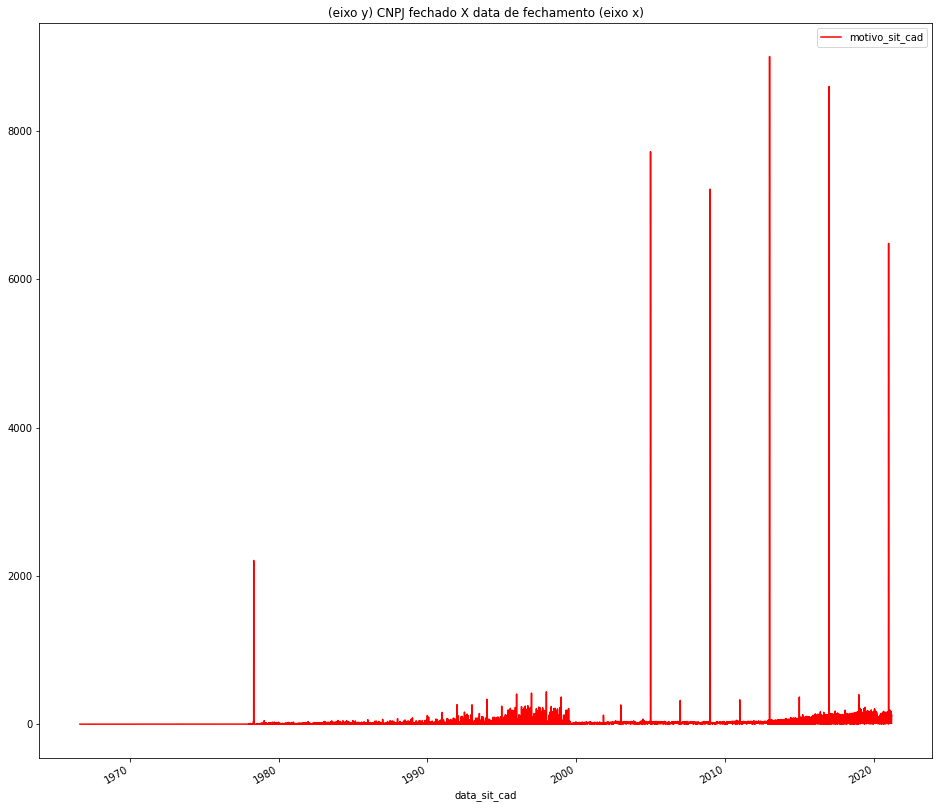

In [ ]:
cnpj_fechou.plot(kind='line', figsize=(16,15), title='(eixo y) CNPJ fechado X data de fechamento (eixo x)', color='r')
#ax = cnpj_fechou.plot(kind='line', figsize=(16,15), x_compat=True)
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_locator(plt.MaxNLocator(50))
#plt.show()

Podemos observar que há certos picos de fechamentos de CNPJ por liquidação voluntária. Destaca-se:

"A recente crise econômica no Brasil, também referida como a grande recessão brasileira,[1][2] teve início em meados de 2014. Uma de suas características foi a forte recessão, que levou a um recuo no produto interno bruto (PIB) por dois anos consecutivos. A economia contraiu-se em cerca de 3,5% em 2015 e 3,3% em 2016.[nota 1] "

Pode-se observar que em 2016 houve 3 picos de fechamentos de empresas. No ano de 2017, 2018 e 2019 não houve picos de fechamentos maiores que 1000.

O fenômeno de 2016 novamente se repetiu em 2020.


In [ ]:
cnpj_fechou[cnpj_fechou['motivo_sit_cad'] > 1000 ].T

data_sit_cad,1978-05-02,2004-12-31,2008-12-31,2012-12-31,2016-12-31,2020-12-31
motivo_sit_cad,2209,7721,7216,9006,8601,6486


Muitas empresas acabaram não aguentando a crise e fecharam as portas em setembro de 2020. Muitas empresas provavelmente aguentaram cerca de 6 meses do início da pandemia (março de 2020) antes de pedirem liquidação voluntária.




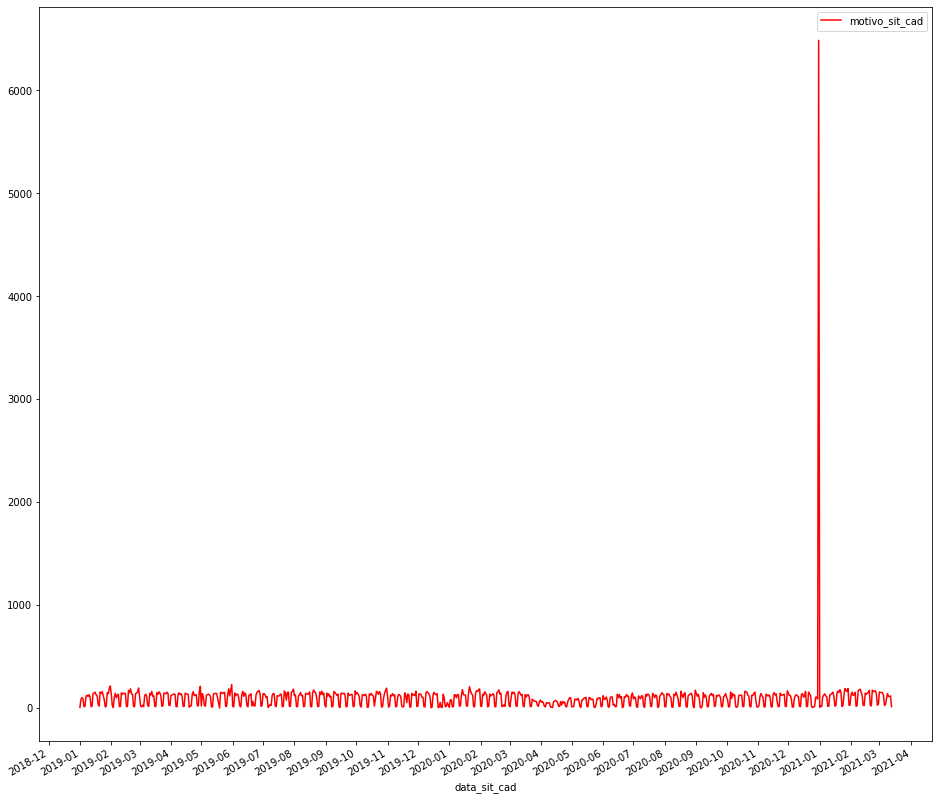

In [ ]:

ax = cnpj_fechou['20190101':'20210313' ].plot(kind='line', figsize=(16,15), x_compat=True, color='r')
ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_locator(plt.MaxNLocator(50))
plt.show()

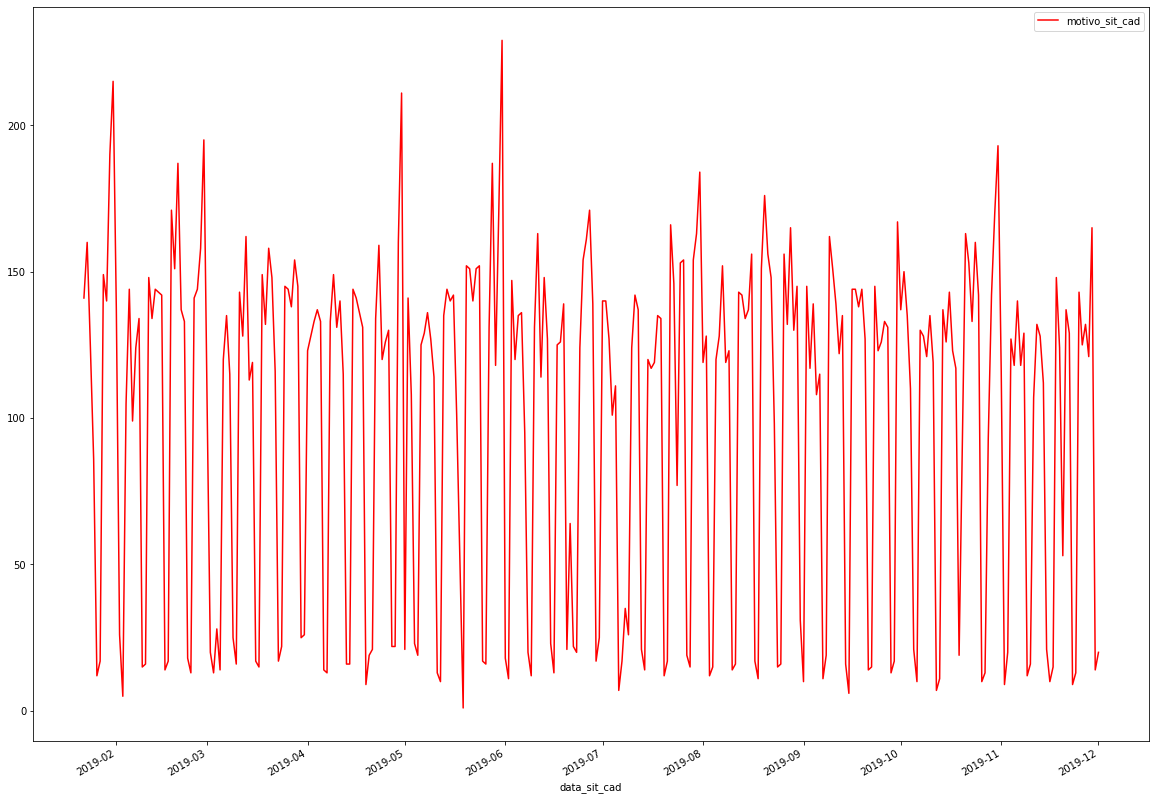

In [ ]:
ax = cnpj_fechou['20190122':'20191201'].plot(kind='line', figsize=(20,15), x_compat=True, color='r')
ax.xaxis.set_major_locator(mdates.MonthLocator()) #para os ticks do eixo x ficaram melhor distribuídos
plt.show()

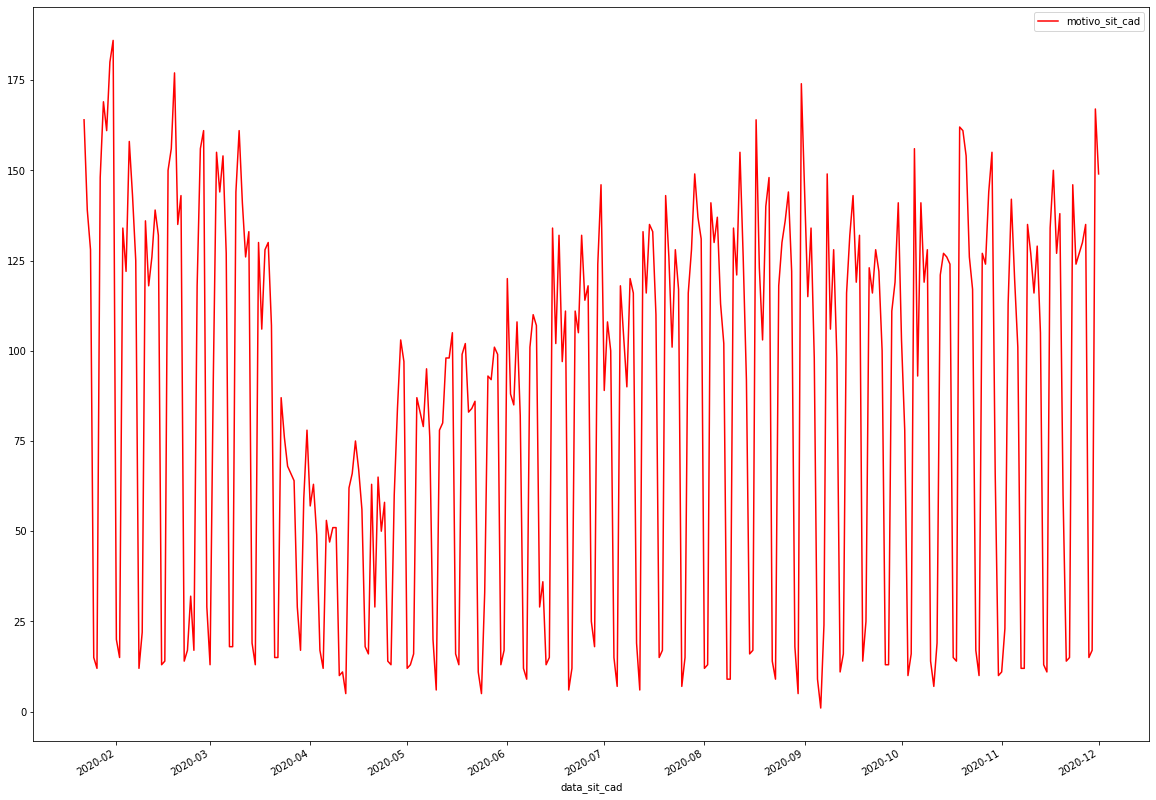

In [ ]:
ax = cnpj_fechou['20200122':'20201201'].plot(kind='line', figsize=(20,15), x_compat=True, color='r')
ax.xaxis.set_major_locator(mdates.MonthLocator()) #para os ticks do eixo x ficaram melhor distribuídos
plt.show()

In [ ]:
copia_cnpj_abertos = cnpj_abriu.copy()
copia_cnpj_fechados = cnpj_fechou.copy()

In [ ]:
cnpj_abriu_fechou = pd.concat([copia_cnpj_abertos, copia_cnpj_fechados], axis=1)
cnpj_abriu_fechou.columns = ['cnpj_abertos', 'cnpj_fechados']
cnpj_abriu_fechou

,cnpj_abertos,cnpj_fechados
1908-08-25,1.0,NaN
1917-01-31,1.0,NaN
1927-04-05,1.0,NaN
1929-06-20,1.0,NaN
1934-01-16,1.0,NaN
...,...,...
2021-03-09,420.0,141.0
2021-03-10,329.0,115.0
2021-03-11,362.0,111.0
2021-03-12,308.0,118.0


## **Vamos ver agora os dois gráficos juntos: abertura e fechamento de cnpj**
 



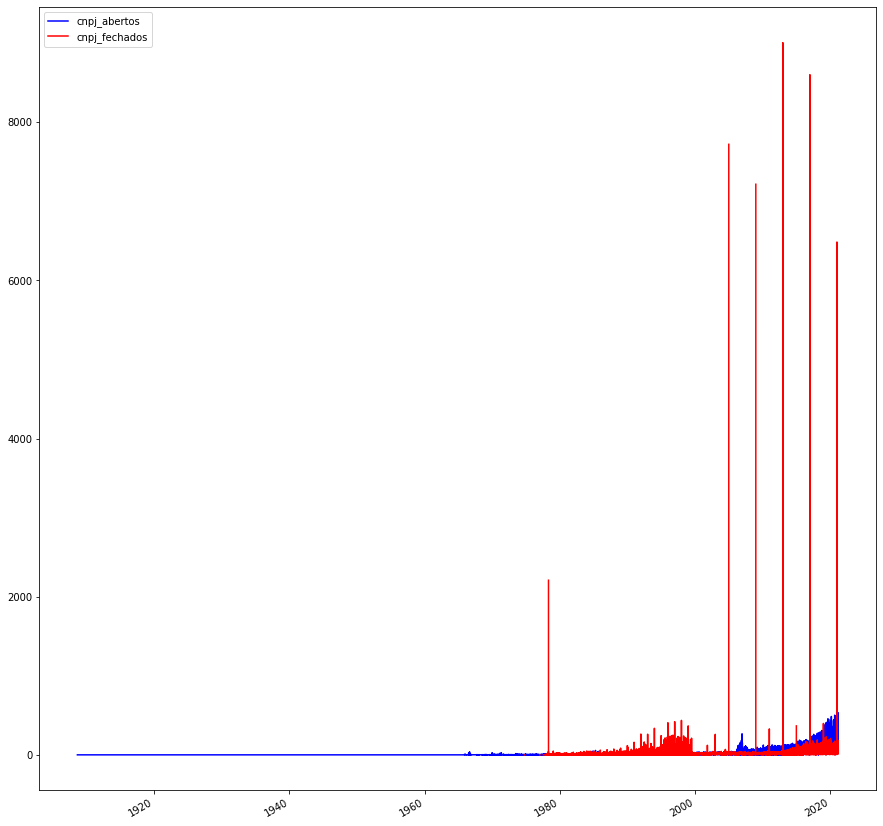

In [ ]:
cnpj_abriu_fechou.plot(kind='line', figsize=(15,16), color=['b','r'])

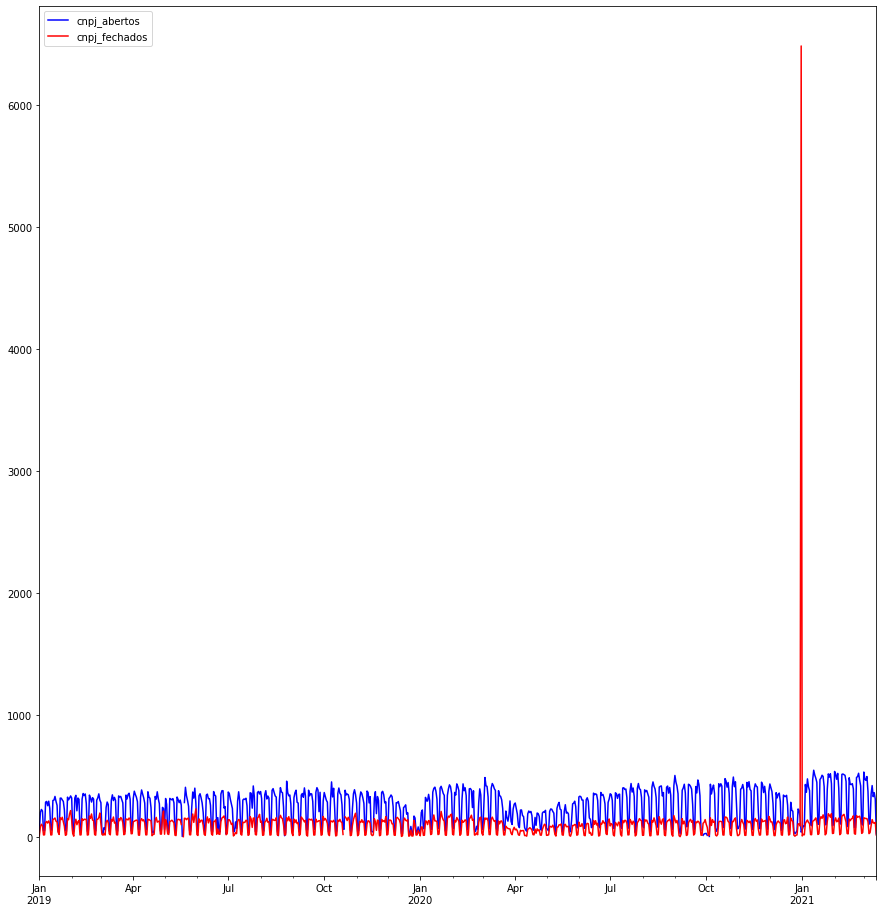

In [ ]:
cnpj_abriu_fechou['20190101':'20210313' ].plot(kind='line', figsize=(15,16), color=['b', 'r'])


# Pode-se observar que muitas empresas fecharam no mês de setembro e houve também uma queda na abertura de cnpjs. Aparentemente pelo gráfico, há um número maior de pedidos de abertura de cnpj em janeiro de 2021 do que em janeiro de 2020, talvez um sinal de confiança na recuperação econômica.

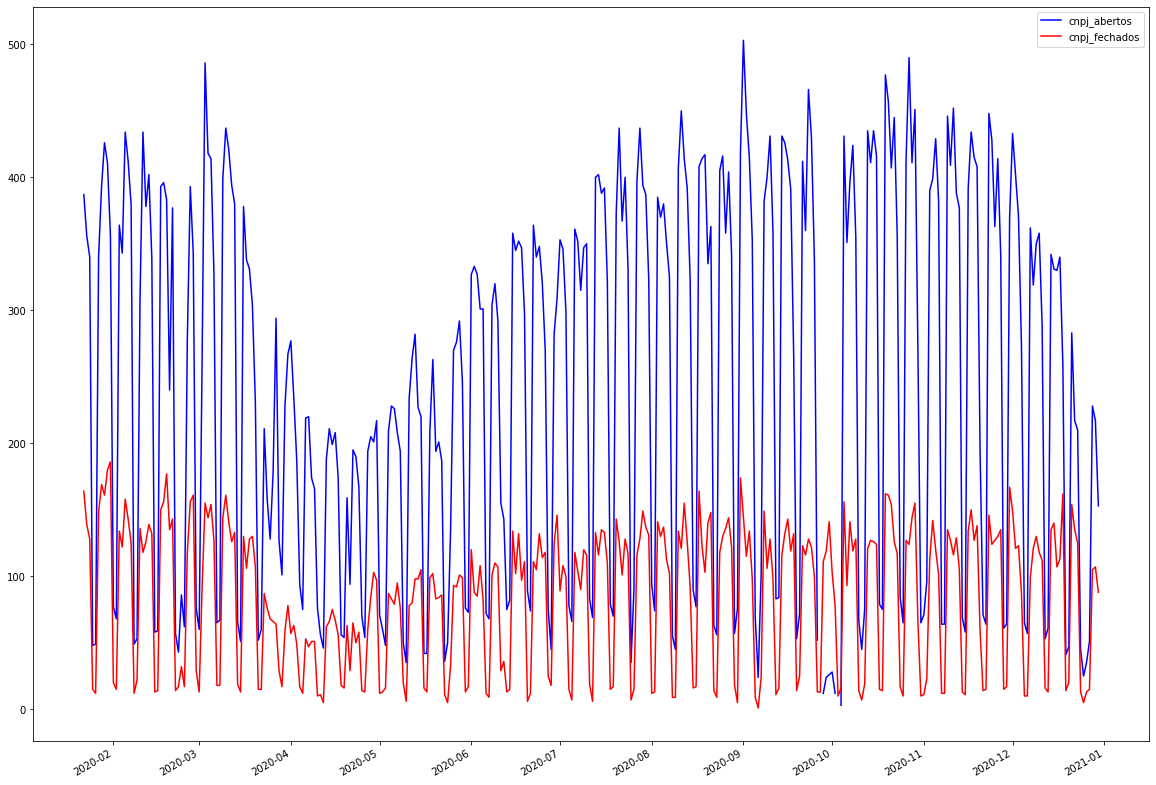

In [ ]:
ax = cnpj_abriu_fechou['20200122':'20201230'].plot(kind='line', figsize=(20,15), x_compat=True, color=['b', 'r'])
ax.xaxis.set_major_locator(mdates.MonthLocator()) #para os ticks do eixo x ficaram melhor distribuídos
plt.show()

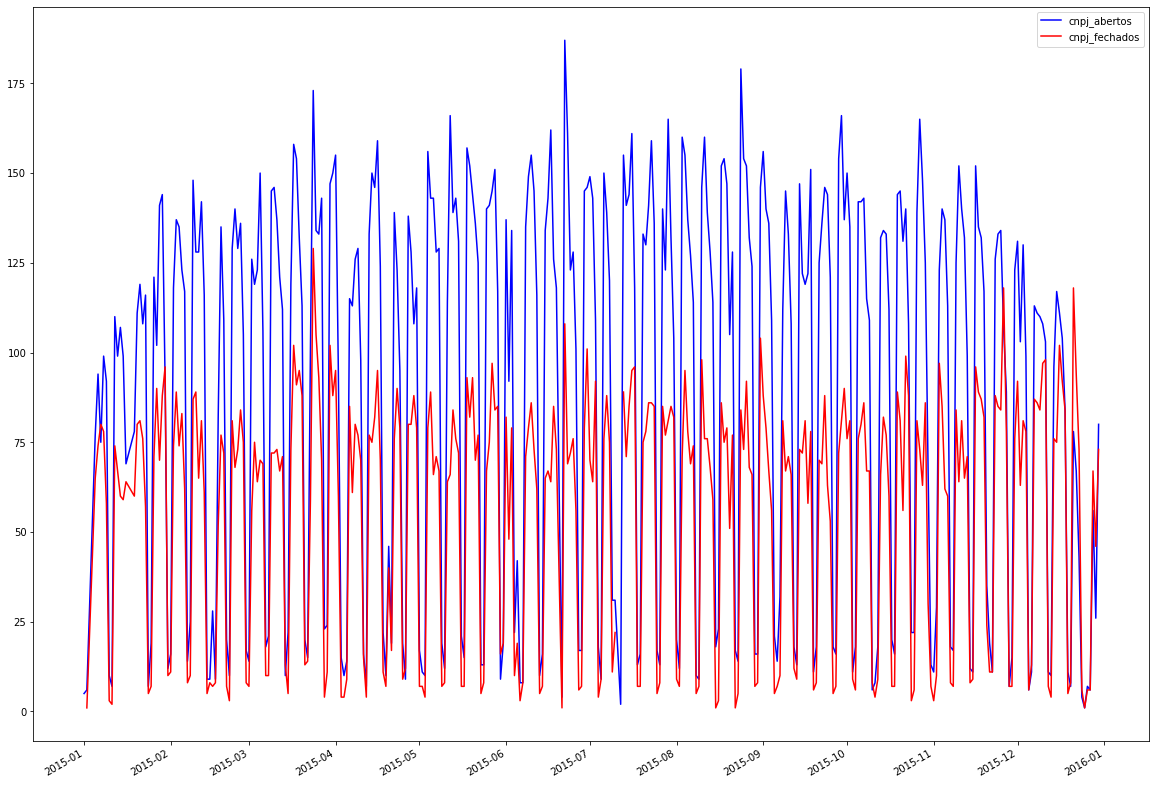

In [ ]:
ax = cnpj_abriu_fechou['20150101':'20151230'].plot(kind='line', figsize=(20,15), x_compat=True, color=['b', 'r'])
ax.xaxis.set_major_locator(mdates.MonthLocator()) #para os ticks do eixo x ficaram melhor distribuídos

plt.show()

In [ ]:
cnpj_abriu_fechou.plot(kind='line', figsize=(15,16))

In [ ]:
f = cnpj_fechou['motivo_sit_cad'] == 6486
cnpj_fechou[f]

,motivo_sit_cad
data_sit_cad,
2020-12-31,6486


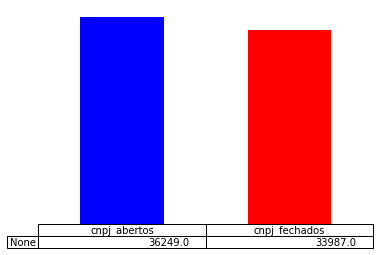

In [ ]:
ano_2016 = cnpj_abriu_fechou['20160101':'20170101'].sum() #ano de 2016-01-01 a 2017 01 01 por liquidação voluntária
ano_2016.plot(kind='bar', table=True, color=['b','r'])
plt.axis('off')
plt.show()

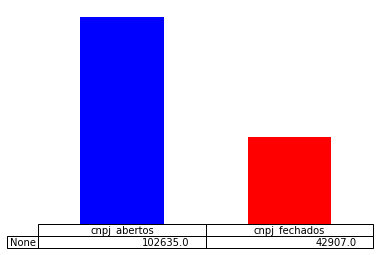

In [ ]:
ano_2019 = cnpj_abriu_fechou['20190101':'20200313'].sum() # periodo de 2020 01 01 a 2021 01 01 por liquidação voluntária
ano_2019.plot(kind='bar', table=True, color=['b','r'] )
plt.axis('off')
plt.show()

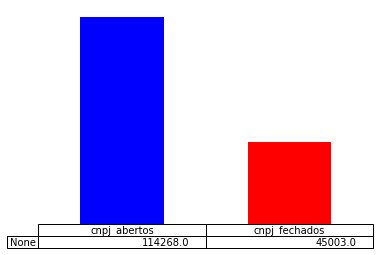

In [ ]:
ano_2020 = cnpj_abriu_fechou['20200101':'20210313'].sum() # periodo de 2020 01 01 a 2021 01 01 por liquidação voluntária
ano_2020.plot(kind='bar', table=True, color=['b','r'])
plt.axis('off')
plt.show()

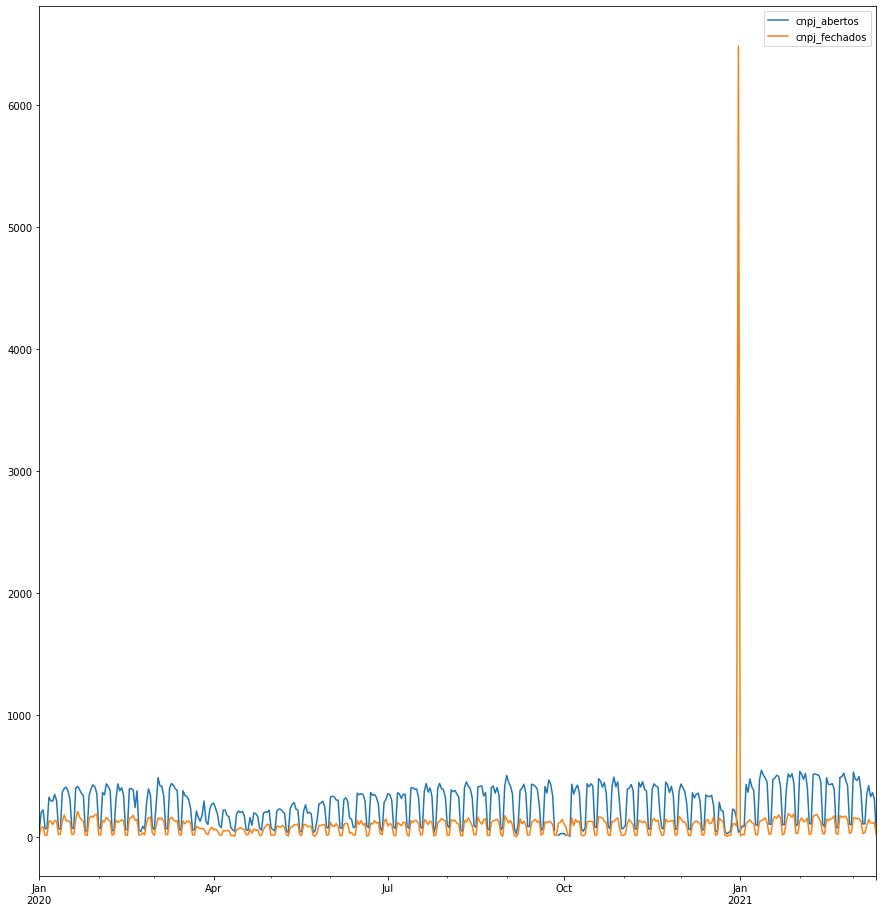

In [ ]:
#Zoom no ano de 2020:
cnpj_abriu_fechou['20200101':].plot(kind='line', figsize=(15,16))

Qual a natureza jurídica dos CNPJS?

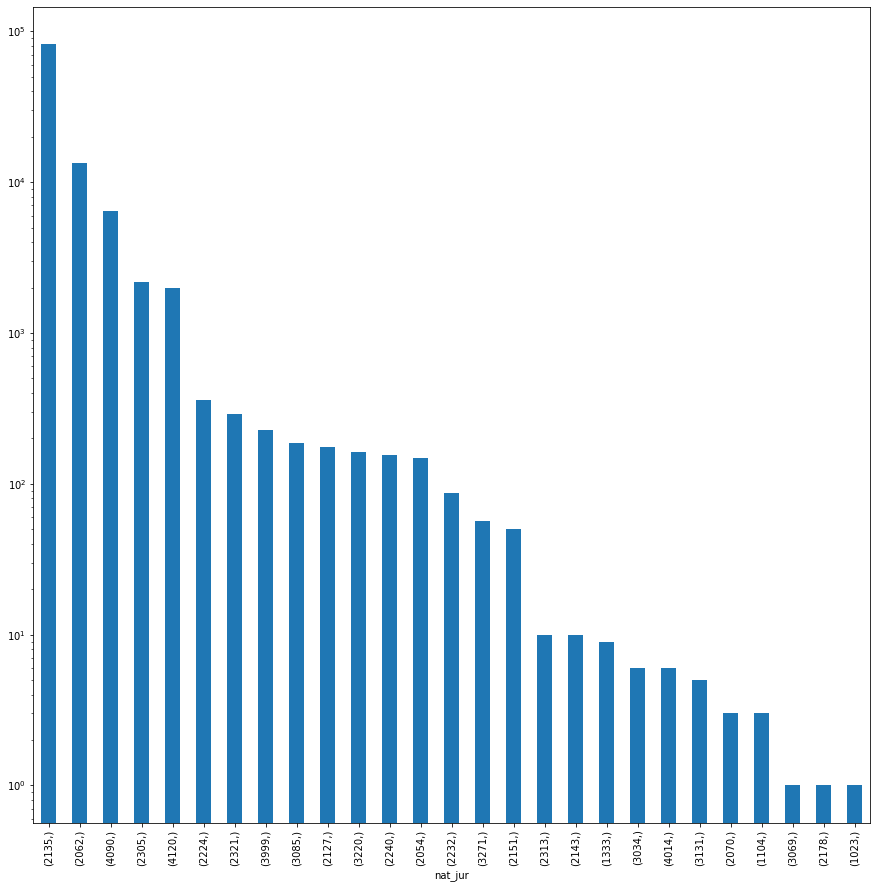

In [ ]:
natureza_juridica_count = data_final[['nat_jur']].value_counts()
natureza_juridica_count.plot(kind='bar', logy=True, figsize=(15,15)) #10^5 = 100.000

In [ ]:
natureza_juridica_count.shape

(27,)

In [ ]:
natureza_juridica_count

nat_jur
2135       82099
2062       13298
4090        6466
2305        2162
4120        1987
2224         359
2321         289
3999         229
3085         185
2127         174
3220         163
2240         156
2054         149
2232          87
3271          57
2151          50
2313          10
2143          10
1333           9
3034           6
4014           6
3131           5
2070           3
1104           3
3069           1
2178           1
1023           1
Length: 27, dtype: int64

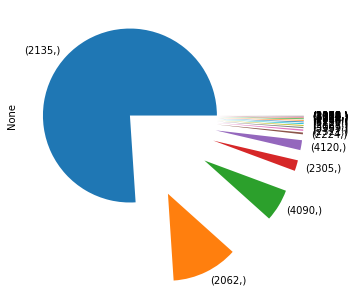

In [ ]:
natureza_juridica_count.plot(kind='pie', explode=[0]+ 26*[1] )


In [ ]:
data_final['nat_jur'].isnull().sum()

901749

In [ ]:
natureza_juridica_count.sum()

107965

In [ ]:
filtro_so_1 = data_final['motivo_sit_cad']=='1'
cnpj_fechou_nat = data_final[filtro_so_1] #usa desde 1966

data_filtro = cnpj_fechou_nat['data_sit_cad'] >= '20200101'
cfn2020 = cnpj_fechou_nat[data_filtro] #usa desde 2020 01 01

#antes de 2020

data_filtro_antes_2020 = cnpj_fechou_nat['data_sit_cad'] < '20200101'
antes_2020_nat_jur = cnpj_fechou_nat[data_filtro_antes_2020]

In [ ]:
print(cnpj_fechou_nat['nat_jur'].isnull().sum())
print(cnpj_fechou_nat['nat_jur'].shape)

367918
(381769,)


In [ ]:
cfn2020['nat_jur'].isnull().sum()

32285

In [ ]:
print(cnpj_fechou_nat.shape) #381769

print(cfn2020.shape, '\n') #45003
45003/381769

(381769, 42)
(45003, 42) 



0.11788018409037926

In [ ]:
natureza_juridica_groupby_antes_2020 = antes_2020_nat_jur.groupby('nat_jur').agg(new_column=('motivo_sit_cad', 'count'))
natureza_juridica_groupby_antes_2020.T

nat_jur,2054,2062,2070,2135,2224,2232,2240,2305,3220,3999,4014
new_column,21,457,3,593,3,2,44,5,1,3,1


In [ ]:
natureza_juridica_groupby.sum()

new_column    13851
Length: 1, dtype: int64

In [ ]:
natureza_juridica_groupby2020 = cfn2020.groupby('nat_jur').agg(new_column=('motivo_sit_cad', 'count'))
natureza_juridica_groupby2020.T

nat_jur,2054,2062,2127,2135,2224,2240,2305,3271,3999,4090
new_column,1,217,5,5984,1,1,45,1,1,6462


In [ ]:
politicos = cfn2020['nat_jur'] == 4090
cfn2020[politicos].head(3)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
102,39318115,0001,64,1,NaN,8,2020-12-31,1,NaN,NaN,2020-10-05,9492800,NaN,AVENIDA,AV EUCALIPTOS,155,AP 62,MOEMA,4517050,SP,7107,0,0,NaN,NaN,0,0,rogeriotabet@ig.com.br,NaN,NaN,ELEICAO 2020 ROGERIO TABET DE OLIVEIRA VEREADOR,4090,51,0.0,5,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
103,39318139,0001,13,1,NaN,8,2020-12-31,1,NaN,NaN,2020-10-05,9492800,NaN,RUA,RUA MANUEL ARAUJO ARAGAO,422,CASA 4,VILA ALBERTINA,2356170,SP,7107,0,0,NaN,NaN,0,0,tomdalotacao27danilo@gmail.com,NaN,NaN,ELEICAO 2020 WELLINGTON PEREIRA DA SILVA VEREADOR,4090,51,0.0,5,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
248,39333835,0001,07,1,NaN,8,2020-12-31,1,NaN,NaN,2020-10-06,9492800,NaN,AVENIDA,AVENIDA CRUZEIRO DO SUL,3153,AP 64,CANINDE,2031200,SP,7107,0,0,NaN,NaN,0,0,candidatospl2020@murielepolicicio.com.br,NaN,NaN,ELEICAO 2020 VALDEMAR ROSENDO MARQUES VEREADOR,4090,51,0.0,5,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0


In [ ]:
natureza_juridica_groupby2020.sum()

new_column    12718
Length: 1, dtype: int64

* 206-2 - Sociedade Empresária Limitada

* 409-0 - Candidato a Cargo Político Eletivo

* 213-5 - Empresário (Individual)
* 230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)
* 213-5 - Empresário (Individual)


2135 : O porte do MEI é microempresa (ME) e a natureza jurídica é 213-5 – Empresário (Individual) constante da Tabela de Natureza Jurídica aprovada pela Comissão Nacional de Classificações (Concla).

In [ ]:
data_final['porte_empresa'].value_counts()

1.0    91824
5.0    12997
3.0     3144
Name: porte_empresa, Length: 3, dtype: int64

## Abriram empresas:


In [ ]:
filtro_so_1 = data_final['motivo_sit_cad']=='0'
cnpj_fechou_nat = data_final[filtro_so_1]
data_filtro = cnpj_fechou_nat['data_sit_cad'] >= '20200101'
cAn2020 = cnpj_fechou_nat[data_filtro]
cAn2020

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
0,39304534,0001,47,1,NaN,2,2020-10-05,0,NaN,NaN,2020-10-05,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,SP,7107,11,50892600,NaN,NaN,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaN,HAVH PARTICIPACOES LTDA,2062.0,49.0,300000.0,5.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
1,39304564,0001,53,1,BRUNO LESSA,2,2020-10-05,0,NaN,NaN,2020-10-05,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,SP,7107,11,47366033,NaN,NaN,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaN,BRUNO GONCALVES PEREIRA LESSA 34599602809,2135.0,50.0,1000.0,1.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
2,39304616,0001,91,1,TALLADEGA BBQ,2,2020-10-05,0,NaN,NaN,2020-10-05,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,SP,7107,11,99999999,NaN,NaN,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaN,TALLADEGA BBQ PARRILLA CHURRASCARIA LTDA,2062.0,49.0,50000.0,3.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
3,39304717,0001,62,1,HORTIFRUTI NOSSO LAR,2,2020-10-05,0,NaN,NaN,2020-10-05,4724500,NaN,RUA,ENGENHEIRO CARLO GRAZIA,135,NaN,CIDADE TIRADENTES,08475410,SP,7107,11,51243081,NaN,NaN,NaN,NaN,JACIARAFABIOKK@GMAIL.COM,NaN,NaN,JACIARA ALVES MACIEL DA SILVA 29089936866,2135.0,50.0,3000.0,1.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
4,37419658,0003,04,2,GOLDEN BLUE,2,2020-10-05,0,NaN,NaN,2020-10-05,4635403,"4672900,4685100,4686902,4930202",RUA,ABRAHAO CALUX,103,NaN,VILA MOINHO VELHO,04286100,SP,7107,64,33221440,NaN,NaN,NaN,NaN,GOLDENBLUEIND@GMAIL.COM,NaN,NaN,GOLDEN BLUE BEBIDAS E DERIVADOS EIRELI,2305.0,65.0,104500.0,3.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009675,15756694,0001,69,1,NaN,2,2020-01-28,0,NaN,NaN,2011-04-11,9492800,NaN,RUA,THEOFILO CORDOVIL,465,NaN,CENTRO,17475000,SP,6651,14,98170948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0
1009710,36984322,0001,60,1,NaN,2,2020-02-06,0,NaN,NaN,2020-02-06,151203,NaN,FAZENDA,CANDEIAS,SN,NaN,ALAMBARI,17479899,SP,6651,14,32821989,NaN,NaN,14,32821989,REGIONAL@AONET.COM.BR,NaN,NaN,MOISES RIBEIRO DE QUEIROZ,4120.0,59.0,0.0,5.0,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0
1009711,37588106,0001,68,1,COMERCIAL TG,2,2020-07-01,0,NaN,NaN,2020-07-01,4712100,NaN,RUA,DONA MARIA FAUSTINA,171,NaN,CENTRO,17475021,SP,6651,14,98498337,NaN,NaN,NaN,NaN,DRIETIFFANY_NUNES@HOTMAIL.COM,NaN,NaN,ADRIANA NUNES DOS SANTOS 38581484824,2135.0,50.0,1000.0,1.0,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0
1009712,37917664,0001,20,1,NaN,2,2020-07-30,0,NaN,NaN,2020-07-30,4744005,4930202,RUA,SAO PEDRO,249,NaN,CENTRO,17475001,SP,6651,14,32825382,NaN,NaN,NaN,NaN,NASCIMENTO.ESCRITORIO@GMAIL.COM,NaN,NaN,SIMEI FARIA DE SOUZA,2135.0,50.0,80000.0,1.0,NaN,LUCIANOPOLIS,SP,3527504,2458.57,57006.0,2403.0


In [ ]:
cAn2020
cAn2020n_atureza_juridica_groupby = cAn2020.groupby('nat_jur').agg(abriu_cnpj=('motivo_sit_cad', 'count'))
cAn2020n_atureza_juridica_groupby.T

nat_jur,1023.0,1333.0,2054.0,2062.0,2127.0,2135.0,2143.0,2151.0,2178.0,2224.0,2232.0,2240.0,2305.0,2313.0,2321.0,3034.0,3069.0,3085.0,3131.0,3220.0,3271.0,3999.0,4014.0,4090.0,4120.0
abriu_cnpj,1,5,97,12416,112,75386,8,50,1,343,79,87,2085,8,272,6,1,97,2,139,49,175,5,4,1962


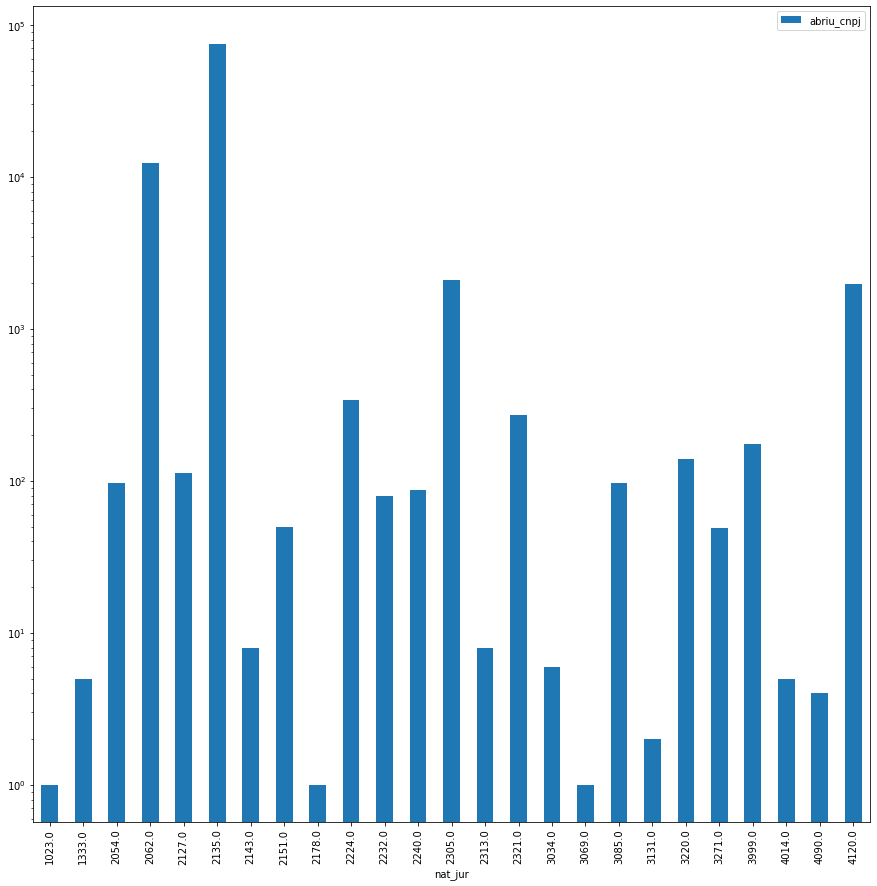

In [ ]:
cAn2020n_atureza_juridica_groupby.plot(kind='bar', logy=True, figsize=(15,15))


Qual o CNAE principal, área de atuação dessas empresas que abriram? Dúvida que cnaes são esses? 2.3, 2.0 ?

* 4781400 = vestuário
* 7319002 = distribuição de matérial publicitário, panfletagem, promoção em pontos de venda
* 9602501 = salão de cabelo e afins
* 8219999 = mala direta, artoes de visita, digitação de textos, fatura, editoração eletrônica
* 5620104 = FORNECIMENTO DE ALIMENTOS PREPARADOS PARA CONSUMO DOMICILIAR; SERVIÇO DE ALIMENTAÇÃO, marmitex, restaurante delivery, pizzaria exclusivamente delivery
* 4930201 = TRANSPORTE RODOVIÁRIO DE CARGAS EM GERAL, MUNICIPAL
* 4399103 = Alvenaria, obras de; CANTARIA, OBRAS DE; TRABALHOS DE PEDREIRO PARA OBRAS DE ALVENARIA, EXECUÇÃO DE

* 5612100 = Food truck, etc

In [ ]:
cnae_natureza_juridica_groupby = cAn2020.groupby('cnae_principal').agg(abriu_cnpj=('motivo_sit_cad', 'count'))
cnae_ordem = cnae_natureza_juridica_groupby.sort_values(by='abriu_cnpj', ascending=False)
cnae_ordem[:20] #seleciona os 20 primeiros maiores

,abriu_cnpj
cnae_principal,
4781400,5929
7319002,4568
9602501,4331
8219999,4118
5620104,3866
4930201,3498
4399103,3149
5611201,2807
5611203,2557


## Os que mais fecharam por CNAE:

In [ ]:
cfn2020.head(2)

,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cidade_exterior,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,uf,municipio_rfb,ddd,tel,ddd2,tel2,dddfax,fax,email,sit_especial,data_sit_especial,razao_social,nat_jur,qual_resp,capital_social,porte_empresa,ente_resp,municipio,uf,codigoibge,renda_media_mensal,pib,populacao
15,39306936,0001,80,1,A.R INFORMATICA,8,2020-12-29,1,NaN,NaN,2020-10-05,4751201,"9511800,5912099,6190699,8219999",RUA,ANTONIO AGOSTIM,20,NaN,JARDIM MIRIAM,04419160,SP,7107,11,91308515,NaN,NaN,NaN,NaN,ARTHUR.JOB.RAFAEL@GMAIL.COM,NaN,NaN,ANTONIA ALINE SOUSA BARBOSA 06122777390,2135.0,50.0,2000.0,1.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0
40,39309338,0001,65,1,ASSISTENCIA TECNICA CELLINE,8,2021-01-07,1,NaN,NaN,2020-10-05,9512600,NaN,RUA,CORONEL CARLOS OLIVA,344,NaN,TATUAPE,03067010,SP,7107,11,20975762,NaN,NaN,NaN,NaN,ASSISTENCIATECNICACELLINE@GMAIL.COM,NaN,NaN,DEIVID HENRIQUE FERREIRA PASSOS 40046031880,2135.0,50.0,4000.0,1.0,NaN,SAO PAULO,SP,3550308,4427.54,714683362.0,12325232.0


In [ ]:
cnae_natureza_juridica_groupby_cfn2020 = cfn2020.groupby('cnae_principal').agg(abriu_cnpj=('motivo_sit_cad', 'count'))
cnae_ordem_fechadas = cnae_natureza_juridica_groupby_cfn2020.sort_values(by='abriu_cnpj', ascending=False)
cnae_ordem_fechadas[:20] #seleciona os 20 primeiros maiores

,abriu_cnpj
cnae_principal,
9492800,6471
4781400,2275
7319002,1494
8219999,1286
5611203,1230
9602501,1050
5620104,954
5611201,846
4930201,783


* 9492-8/00	ARRECADAÇÃO DE FUNDOS PARA CAMPANHAS POLÍTICAS; ATIVIDADE DE
* 9492-8/00	COMITÊ POLÍTICO; ORGANIZAÇÃO DE
* 9492-8/00	PARTIDO POLÍTICO
* 9492-8/00	DIRETÓRIO REGIONAL DE PARTIDO POLÍTICO

--- 
* 4781-4/00	ARTIGOS DO VESTUÁRIO; COMÉRCIO VAREJISTA
---
* 5611-2/03	BAR SEM SERVIÇO COMPLETO
* 5611-2/03	LANCHERIA; SERVIÇO DE ALIMENTAÇÃO
* 5611-2/03	LANCHONETE; SERVIÇO DE ALIMENTAÇÃO
* 5611-2/03	ALIMENTAÇÃO SEM SERVIÇO COMPLETO; SERVIÇO DE
-----
5611-2/01	A KILO; ALIMENTAÇÃO, COMIDA, REFEIÇÃO



## Métrica de avaliação do modelo

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a

rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false

positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC

AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to

the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be

closer to the top-right corner)

É mais importante saber se uma empresa vai quebrar pra não perder dinheiro investido do que saber se ela vai manter na ativa [Aurelien Geron]

# Nova seção: Outros


In [ ]:
filtro_1 = sao_paulo_binario['inicio_atividade'] == '2021-03-09'
filtro_2 = sao_paulo_binario['motivo_sit_cad'] == '1'
sao_paulo_binario[filtro_1&filtro_2]

,Unnamed: 0,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,municipio_rfb,tel,tel.1,fax,email,sit_especial,data_sit_especial,municipio,UF,CodigoIbge,PIB,Renda_Media,Populacao,Ensino_superior
16313,16427,41146749,0001,29,1,DESPACHANTE ELIS,8,20210309,1,NaN,2021-03-09,8219999,NaN,RUA,MURILO FURTADO,747,NaN,PARQUE VITORIA,02270000,7107,25281410,NaN,NaN,ISMAELENAGD@YAHOO.COM.BR,NaN,NaT,SAO PAULO,SP,3550308,714683362.0,4427.54,12325232.0,1572070
871420,1188210,41139145,0001,55,1,RAMPSS,8,20210309,1,NaN,2021-03-09,4330403,4543900,RUA,BELEM,97,NaN,VILA VARGAS,17605229,7201,34964721,NaN,NaN,RAMPIMVTHEUS@GMAIL.COM,NaN,NaT,TUPA,SP,3555000,1794917.0,2724.68,65570.0,7613


In [ ]:
sao_paulo_binario[filtro_1].nunique()

NameError: ignored

In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           _38: 12.6 GiB
                          data:  7.9 GiB
                           _41:  7.9 GiB
                           _36:  7.1 GiB
              estabelecimentos:  7.1 GiB
                            sp:  2.3 GiB
                           _40:  2.3 GiB
                           _43:  2.3 GiB
                           _45:  2.3 GiB
                       sp_ibge:  2.1 GiB


# Edição:

In [ ]:
!unzip '/content/drive/MyDrive/Data/csv_dados_qsa_cnpj_23-11-20.zip' -d '/content/drive/MyDrive/Data'

Archive:  /content/drive/MyDrive/Data/csv_dados_qsa_cnpj_23-11-20.zip
  inflating: /content/drive/MyDrive/Data/tab_codigo_municipios_siafi.csv  
  inflating: /content/drive/MyDrive/Data/tab_natureza_juridica.csv  
  inflating: /content/drive/MyDrive/Data/tab_qualificacao_responsavel_socio.csv  
  inflating: /content/drive/MyDrive/Data/tab_situacao_cadastral.csv  
  inflating: /content/drive/MyDrive/Data/cnpj_dados_cadastrais_pj.csv  
  inflating: /content/drive/MyDrive/Data/cnpj_dados_cnae_secundario.csv  
  inflating: /content/drive/MyDrive/Data/cnpj_dados_socios_pj.csv  
  inflating: /content/drive/MyDrive/Data/tab_cnae.csv  
  inflating: /content/drive/MyDrive/Data/tab_cnpj_entes_publicos.csv  


In [ ]:
!unzip '/content/drive/MyDrive/Data/K3241.K03200Y7.D10313.EMPRECSV.zip' -d '/content/drive/MyDrive/Data'

Archive:  /content/drive/MyDrive/Data/K3241.K03200Y7.D10313.EMPRECSV.zip
  inflating: /content/drive/MyDrive/Data/K3241.K03200Y7.D10313.EMPRECSV  


In [ ]:
sao_paulo_binario.head()

,Unnamed: 0,cnpj_basico,ordem,dv,matriz_filial,nome,situacao_cadastral,data_sit_cad,motivo_sit_cad,cod_pais,inicio_atividade,cnae_principal,cnae_secund,tipo,logradouro,numero,complemento,bairro,cep,municipio_rfb,tel,tel.1,fax,email,sit_especial,data_sit_especial,municipio,UF,CodigoIbge,PIB,Renda_Media,Populacao,Ensino_superior
0,0,39304534,0001,47,1,NaN,2,20201005,0,NaN,2020-10-05,6810202,"6462000,7490104",RUA,DONA INACIA UCHOA,136,SALA 13,VILA MARIANA,04110020,7107,50892600,NaN,NaN,JULIO.LANDIM@CADIS.COM.BR,NaN,NaT,SAO PAULO,SP,3550308,714683362,4427.54,12325232.0,1572070
1,1,39304564,0001,53,1,BRUNO LESSA,2,20201005,0,NaN,2020-10-05,1091102,5620104,RUA,LAGOA DA SERRA,53,NaN,JARDIM PAULISTANO (ZONA NORTE),02814030,7107,47366033,NaN,NaN,BL5388254@GMAIL.COM,NaN,NaT,SAO PAULO,SP,3550308,714683362,4427.54,12325232.0,1572070
2,2,39304616,0001,91,1,TALLADEGA BBQ,2,20201005,0,NaN,2020-10-05,5611201,"4729699,5611203,5611205",AVENIDA,CASA VERDE,1800,NaN,CASA VERDE,02520100,7107,99999999,NaN,NaN,AAA@AAAA.COM.BR,NaN,NaT,SAO PAULO,SP,3550308,714683362,4427.54,12325232.0,1572070
3,3,39304717,0001,62,1,HORTIFRUTI NOSSO LAR,2,20201005,0,NaN,2020-10-05,4724500,NaN,RUA,ENGENHEIRO CARLO GRAZIA,135,NaN,CIDADE TIRADENTES,08475410,7107,51243081,NaN,NaN,JACIARAFABIOKK@GMAIL.COM,NaN,NaT,SAO PAULO,SP,3550308,714683362,4427.54,12325232.0,1572070
4,4,37419658,0003,04,2,GOLDEN BLUE,2,20201005,0,NaN,2020-10-05,4635403,"4672900,4685100,4686902,4930202",RUA,ABRAHAO CALUX,103,NaN,VILA MOINHO VELHO,04286100,7107,33221440,NaN,NaN,GOLDENBLUEIND@GMAIL.COM,NaN,NaT,SAO PAULO,SP,3550308,714683362,4427.54,12325232.0,1572070


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


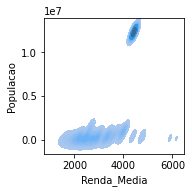

In [ ]:

fig, ax = plt.pyplot.subplots(figsize=(2.5, 2.5))
sns.kdeplot(data=sao_paulo_binario['Renda_Media'], data2=sao_paulo_binario['Populacao'], shade=True, ax=ax)

##Coisas a fazer



1.   qtd de registros obtidos
2.   qtd de registros duplicados
3.   qtd de null
4.   q tratamento foi dado para esses problemas e todos os demais problemas do dataset
5.   Pessoa deve conseguir reproduzir o meu processamento de forma precisa
6. Justique minhas decisoes tomadas no tratamento de dados

AED:

1.   mostrar hipoteses levantadas e insights identificados




Talvez modelar o periodo de tempo como cenarios de acordo com economistas, ex. crise, retomada, pandemia